In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!source /content/drive/MyDrive/colab_env/bin/activate

In [4]:
import pandas as pd
import numpy as np
import pyarrow
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lars, LarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import plotly.express as px
from sklearn.feature_selection import RFE, SelectKBest, f_regression, SelectFromModel
from sklearn.tree import DecisionTreeRegressor
import math
from scipy import stats
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from numpy import mean, std
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns

In [5]:
monthly_dataset = pd.read_parquet("/content/drive/MyDrive/EC_Tower/monthly_dataset_3sep.parquet", engine='pyarrow')


# Clean Data

In [6]:
monthly_dataset = monthly_dataset.drop(["evaporation_from_bare_soil_max",
                                        "evaporation_from_bare_soil_min",
                                        "evaporation_from_bare_soil_sum",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_max",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_min",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_sum",
                                        "evaporation_from_the_top_of_canopy_max",
                                        "evaporation_from_the_top_of_canopy_min",
                                        "evaporation_from_the_top_of_canopy_sum",
                                        "evaporation_from_vegetation_transpiration_max",
                                        "evaporation_from_vegetation_transpiration_min",
                                        "evaporation_from_vegetation_transpiration_sum",
                                        "forecast_albedo_min",
                                        "lake_bottom_temperature",
                                        "lake_bottom_temperature_max",
                                        "lake_bottom_temperature_min",
                                        "lake_ice_depth",
                                        "lake_ice_depth_max",
                                        "lake_ice_depth_min",
                                        "lake_ice_temperature",
                                        "lake_ice_temperature_max",
                                        "lake_ice_temperature_min",
                                        "lake_mix_layer_depth",
                                        "lake_mix_layer_depth_max",
                                        "lake_mix_layer_depth_min",
                                        "lake_mix_layer_temperature",
                                        "lake_mix_layer_temperature_max",
                                        "lake_mix_layer_temperature_min",
                                        "lake_shape_factor",
                                        "lake_shape_factor_max",
                                        "lake_shape_factor_min",
                                        "lake_total_layer_temperature",
                                        "lake_total_layer_temperature_max",
                                        "lake_total_layer_temperature_min",
                                        "potential_evaporation_max",
                                        "potential_evaporation_min",
                                        "potential_evaporation_sum",
                                        "runoff_max",
                                        "runoff_min",
                                        "runoff_sum",
                                        "skin_reservoir_content",
                                        "skin_reservoir_content_max",
                                        "skin_reservoir_content_min",
                                        "skin_temperature",
                                        "skin_temperature_max",
                                        "skin_temperature_min",
                                        "snow_albedo",
                                        "snow_albedo_max",
                                        "snow_albedo_min",
                                        "snow_cover",
                                        "snow_cover_max",
                                        "snow_cover_min",
                                        "snow_density",
                                        "snow_density_max",
                                        "snow_density_min",
                                        "snow_depth",
                                        "snow_depth_max",
                                        "snow_depth_min",
                                        "snow_depth_water_equivalent",
                                        "snow_depth_water_equivalent_max",
                                        "snow_depth_water_equivalent_min",
                                        "snow_evaporation_max",
                                        "snow_evaporation_min",
                                        "snow_evaporation_sum",
                                        "snowfall_max",
                                        "snowfall_min",
                                        "snowfall_sum",
                                        "snowmelt_max",
                                        "snowmelt_min",
                                        "snowmelt_sum",
                                        "sub_surface_runoff_max",
                                        "sub_surface_runoff_min",
                                        "sub_surface_runoff_sum",
                                        "surface_latent_heat_flux_max",
                                        "surface_latent_heat_flux_min",
                                        "surface_latent_heat_flux_sum",
                                        "surface_net_solar_radiation_min",
                                        "surface_net_thermal_radiation_max",
                                        "surface_net_thermal_radiation_min",
                                        "surface_net_thermal_radiation_sum",
                                        "surface_runoff_max",
                                        "surface_runoff_min",
                                        "surface_runoff_sum",
                                        "surface_sensible_heat_flux_min",
                                        "surface_sensible_heat_flux_sum",
                                        "surface_solar_radiation_downwards_min",
                                        "surface_solar_radiation_downwards_sum",
                                        "surface_thermal_radiation_downwards_sum",
                                        "temperature_of_snow_layer",
                                        "temperature_of_snow_layer_max",
                                        "temperature_of_snow_layer_min",
                                        "total_evaporation_max",
                                        "total_evaporation_min",
                                        "total_evaporation_sum",
                                        "total_precipitation_min",
                                        "total_precipitation_sum",
                                        "u_component_of_wind_10m",
                                        "u_component_of_wind_10m_min",
                                        "v_component_of_wind_10m",
                                        "v_component_of_wind_10m_min",
                                        "leaf_area_index_low_vegetation_max",
                                        "leaf_area_index_low_vegetation_min",
                                        "leaf_area_index_high_vegetation_max",
                                        "leaf_area_index_high_vegetation_min",
                                        "forecast_albedo_max",
                                        "soil_temperature_level_1_max",
                                        "soil_temperature_level_1_min",
                                        "soil_temperature_level_2_max",
                                        "soil_temperature_level_2_min",
                                        "soil_temperature_level_3_max",
                                        "soil_temperature_level_3_min",
                                        "soil_temperature_level_4_min",
                                        "soil_temperature_level_4_max",
                                        "volumetric_soil_water_layer_1_max",
                                        "volumetric_soil_water_layer_1_min",
                                        "volumetric_soil_water_layer_2_max",
                                        "volumetric_soil_water_layer_2_min",
                                        "volumetric_soil_water_layer_3_max",
                                        "volumetric_soil_water_layer_3_min",
                                        "volumetric_soil_water_layer_4_max",
                                        "volumetric_soil_water_layer_4_min",
                                        "swe"], axis = 1)

In [7]:
def subtract_lists(list1, list2):
    return list(set(list1) - set(list2))


def searchcv(param_dict, model, x, y, cv=5):

  # Perform RandomizedSearchCV to find the best hyperparameters
  grid_search = GridSearchCV(estimator=model, param_grid=param_dict, cv=cv, n_jobs=-1, scoring='r2')

  grid_search.fit(x, y)

  # Best parameters
  best_params = grid_search.best_params_
  print('Best parameters found: ', best_params)

  # Train the model with the best parameters
  best_model = grid_search.best_estimator_

  return best_params, best_model


def calculate_metrics(actual, predicted):

    actual = actual
    predicted = predicted

    rmse = np.sqrt(mean_squared_error(actual, predicted))

    nse = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

    nrmse = rmse / (np.max(actual) - np.min(actual))

    r = stats.pearsonr(predicted,actual)[0]
    r2= r**2

    mean_value = sum(predicted) / len(predicted)
    var_value = sum(pow(x-mean_value,2) for x in predicted) / len(predicted)  # variance
    std  = math.sqrt(var_value)  # standard deviation

    mbe = np.mean(predicted - actual)  # Mean Bias Error

    return rmse, nse, nrmse, r2, r, std, mbe


# Yearly data

In [ ]:


clean_monthly_dataset = monthly_dataset.drop(['General_classification',
                                              'Land_cover_details',
                                              'Land_cover_type',
                                              'time',
                                              'date',
                                              'Month',
                                              'Year',
                                              'Site_ID'], axis =1)

# List of columns to sum (replace with your actual column names)
sum_columns = ['evaporation_from_vegetation_transpiration_sum',
               'potential_evaporation_max',
               'potential_evaporation_min',
                'potential_evaporation_sum',
                'runoff_max',
                'runoff_min',
                'runoff_sum',
                'skin_reservoir_content',
                'skin_reservoir_content_max',
                'skin_reservoir_content_min',
                'snow_depth',
                'snow_depth_max',
                'snow_depth_min',
                'snow_depth_water_equivalent',
                'snow_depth_water_equivalent_max',
                'snow_depth_water_equivalent_min',
                'snow_evaporation_max',
                'snow_evaporation_min',
                'snow_evaporation_sum',
                'snowfall_max',
                'snowfall_min',
                'snowfall_sum',
                'snowmelt_max',
                'snowmelt_min',
                'snowmelt_sum',
                'sub_surface_runoff_max',
                'sub_surface_runoff_min',
                'sub_surface_runoff_sum',
                'surface_runoff_max',
                'surface_runoff_min',
                'surface_runoff_sum',
                'total_evaporation_max',
                'total_evaporation_min',
                'total_evaporation_sum',
                'total_precipitation_max',
                'total_precipitation_min',
                'total_precipitation_sum',
                'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_1_max',
                'volumetric_soil_water_layer_1_min',
                'volumetric_soil_water_layer_2',
                'volumetric_soil_water_layer_2_max',
                'volumetric_soil_water_layer_2_min',
                'volumetric_soil_water_layer_3',
                'volumetric_soil_water_layer_3_max',
                'volumetric_soil_water_layer_3_min',
                'volumetric_soil_water_layer_4',
                'volumetric_soil_water_layer_4_max',
                'volumetric_soil_water_layer_4_min',
                'aet',
                'def',
                'pet',
                'pr',
                'ro',
                'soil',
                'swe',
                'delta_s']

mean_columns = subtract_lists(clean_monthly_dataset.columns.to_list(), sum_columns)

In [ ]:
monthly_dataset_1 = monthly_dataset.drop(['General_classification',
                                          'Land_cover_details',
                                          'Land_cover_type',
                                          'time',
                                          'date'], axis =1)

# yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg({
#     **{col: 'sum' for col in sum_columns},
#     **{col: 'mean' for col in mean_columns}
#     }).reset_index()

yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg('mean').reset_index()


In [ ]:
yearly_dataset_1 = yearly_dataset.drop(["Site_ID"], axis=1)
yearly_dataset_basin = yearly_dataset_1.groupby(['Year']).agg('median').reset_index()


X = yearly_dataset.drop(['Site_ID',
                         'ET_fill',
                         'eto_hargreaves',
                         'Month'], axis =1)

y = yearly_dataset['ET_fill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Anomaly data

In [ ]:
monthly_data_for_basin = monthly_dataset.groupby(['Year', 'Month']).agg('median').reset_index()

anomalydata = monthly_data_for_basin.groupby(['Month']).agg('mean').reset_index()

# Monthly data

In [9]:
X = monthly_dataset.drop(['ET_fill',
                          'Site_ID',
                          'General_classification',
                          'Land_cover_details',
                          'Land_cover_type',
                          'eto_hargreaves',
                          'time',
                          'date',
                          'aet',
                          'pet',
                          'delta_s',
                          'def'], axis =1)

# X = monthly_dataset.drop(['ET_fill',
#                        'Site_ID',
#                        'General_classification',
#                        'Land_cover_details',
#                        'Land_cover_type',
#                        'eto_hargreaves',
#                        'evaporation_from_bare_soil_max',
#                        'evaporation_from_bare_soil_min',
#                        'evaporation_from_bare_soil_sum',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_max',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_min',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_sum',
#                        'evaporation_from_the_top_of_canopy_max',
#                        'evaporation_from_the_top_of_canopy_min',
#                        'evaporation_from_the_top_of_canopy_sum',
#                        'evaporation_from_vegetation_transpiration_max',
#                        'evaporation_from_vegetation_transpiration_min',
#                        'evaporation_from_vegetation_transpiration_sum',
#                        'potential_evaporation_max',
#                        'potential_evaporation_min',
#                        'potential_evaporation_sum',
#                        'total_evaporation_max',
#                        'total_evaporation_min',
#                        'total_evaporation_sum',
#                        'aet',
#                        'pet',
#                        'time',
#                        'date'], axis =1)

y = monthly_dataset['ET_fill']





# select good n feature

In [ ]:
n_x = X.shape[1]
def get_models():
    models = dict()
    for i in range(2, n_x + 1):
        rfe = RFE(
            estimator=RandomForestRegressor(n_estimators=10),
            n_features_to_select=i
        )
        model = RandomForestRegressor(n_estimators=10)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, x, y):
    cv = RepeatedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    scores = cross_val_score(
        model,
        x,
        y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        error_score='raise'
    )
    return scores

In [ ]:
models = get_models()

In [ ]:
list_1 = dict(list(models.items())[30:])

# results, names = list(), list()
for name, model in list_1.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>32 -6.083 (1.308)
>33 -6.081 (1.200)
>34 -6.229 (1.194)
>35 -6.066 (1.171)
>36 -6.167 (1.187)
>37 -5.982 (1.095)
>38 -6.107 (1.266)
>39 -5.962 (1.165)
>40 -6.027 (1.224)
>41 -6.189 (1.247)
>42 -6.032 (1.090)
>43 -6.047 (1.173)
>44 -5.981 (1.149)
>45 -6.135 (1.195)
>46 -5.961 (1.281)
>47 -5.981 (1.208)
>48 -6.049 (1.234)


In [ ]:

result_chart = pd.DataFrame({
    'Name': names,
    'Result': results
})
result_chart.to_parquet("/content/drive/MyDrive/EC_Tower/result/result_XY_chart_rf_chartcv_23Oct.parquet",
                  engine="pyarrow")


In [ ]:
result_chart = pd.read_parquet("/content/drive/MyDrive/EC_Tower/result/result_XY_chart_rf_chartcv_23Oct.parquet", engine='pyarrow')
list(result_chart["Result"][0])

[-6.12602966181974,
 -7.836969692742014,
 -10.203853453940921,
 -8.14585891862378,
 -7.245396415217593,
 -6.374170068262533,
 -6.486934825823877,
 -6.669857839424313,
 -8.20270835728861,
 -6.536555391062588,
 -7.3614761280531615,
 -5.4032881472771725,
 -7.795269726628726,
 -7.8556895356293985,
 -8.961839599036809,
 -5.200206604442024,
 -7.8898042408456295,
 -10.60146711193637,
 -6.4872195932838155,
 -5.057215935507041,
 -7.508157789561214,
 -8.563112596731463,
 -5.072223293060394,
 -8.26936695727889,
 -7.369054186377835,
 -7.092857583894454,
 -8.31009425720202,
 -6.079427232702477,
 -5.687184183546984,
 -7.748468260388926]

In [ ]:
result_chart['result_list'] = None
for i in range(0,len(result_chart)):
  result_chart['result_list'][i] = list(result_chart["Result"][i])

<ipython-input-21-7d908abeb81f>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_chart['result_list'][i] = list(result_chart["Result"][i])
<ipython-input-21-7d908abeb81f>:3: FutureWarning: ChainedAssignmentError: behaviour will change

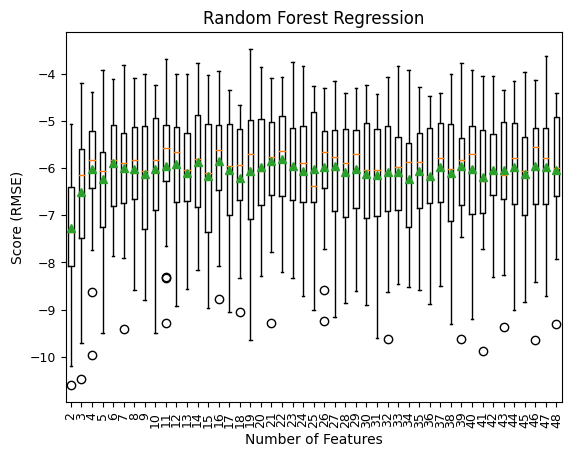

In [ ]:

pyplot.boxplot(
    list(result_chart["result_list"]),
    labels=list(result_chart["Name"]),
    showmeans=True
)

pyplot.title("Random Forest Regression")
pyplot.xlabel("Number of Features")
pyplot.ylabel("Score (RMSE)")
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
pyplot.show()

# Plot Coorelation Features

In [ ]:
#terra - 13
# df = monthly_dataset[[
#     'aet',
#  'def',
#  'pdsi',
#  'pet',
#  'pr',
#  'ro',
#  'soil',
#  'srad',
#  'tmmx',
#  'tmmn',
#  'vap',
#  'vpd',
#  'vs']]


#Era5 - 15
df = monthly_dataset.drop(['ET_fill',
                           'aet',
                           'def',
                           'pdsi',
                           'pet',
                           'pr',
                           'ro',
                           'soil',
                           'srad',
                           'tmmx',
                           'tmmn',
                           'vap',
                           'vpd',
                           'vs',
                           'Site_ID',
                           'General_classification',
                           'Land_cover_details',
                           'Land_cover_type',
                           'time',
                           'date',
                           "category_encoded_Site_ID",
                           "category_encoded_General_classification",
                           "category_encoded_Land_cover_details",
                           "category_encoded_Land_cover_type"], axis =1)

df = df.rename(columns={'dewpoint_temperature_2m': 'dewT2m',
                        'dewpoint_temperature_2m_max': 'dewT2m_max',
                        'dewpoint_temperature_2m_min': 'dewT2m_min',
                        'leaf_area_index_high_vegetation': 'lai_high',
                        'leaf_area_index_low_vegetation': 'lai_low',
                        'soil_temperature_level_1': 'soilT_1',
                        'soil_temperature_level_2': 'soilT_2',
                        'soil_temperature_level_3': 'soilT_3',
                        'soil_temperature_level_4': 'soilT_4',
                        'surface_net_solar_radiation_max': 'r_max',
                        'surface_net_solar_radiation_sum': 'r_sum',
                        'surface_pressure': 's_pressure',
                        'surface_pressure_max': 's_p_max',
                        'surface_pressure_min': 's_p_min',
                        'surface_sensible_heat_flux_max': 'ss_heat_flux_max',
                        'surface_solar_radiation_downwards_max': 'ss_r_d_max',
                        'surface_thermal_radiation_downwards_max': 'st_r_d_max',
                        'surface_thermal_radiation_downwards_min': 'st_r_d_min',
                        'temperature_2m': 'T_2m',
                        'temperature_2m_max': 'T_2m_max',
                        'temperature_2m_min': 'T_2m_min',
                        'total_precipitation_max': 'pr_max',
                        'u_component_of_wind_10m_max': 'u_wind_10m_max',
                        'v_component_of_wind_10m_max': 'v_wind_10m_max',
                        'volumetric_soil_water_layer_1': 'soil_water_1',
                        'volumetric_soil_water_layer_2': 'soil_water_2',
                        'volumetric_soil_water_layer_3': 'soil_water_3',
                        'volumetric_soil_water_layer_4': 'soil_water_4'})

## Correlation Matrix

In [ ]:
# Function to plot correlation matrix
def plot_correlation_matrix(data, n_features=10):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find the top n_features pairs with the highest absolute correlation
    top_corr = upper.abs().unstack().sort_values(ascending=False).head(n_features)

    # Get unique features from top correlations
    unique_features = list(set(top_corr.index.get_level_values(0)) | set(top_corr.index.get_level_values(1)))

    # Create a subset of the correlation matrix with only the top correlated features
    corr_subset = corr_matrix.loc[unique_features, unique_features]

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Create a heatmap
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

    plt.title(f'Correlation Matrix of Top {n_features} Correlated Feature Pairs')
    plt.tight_layout()
    plt.show()

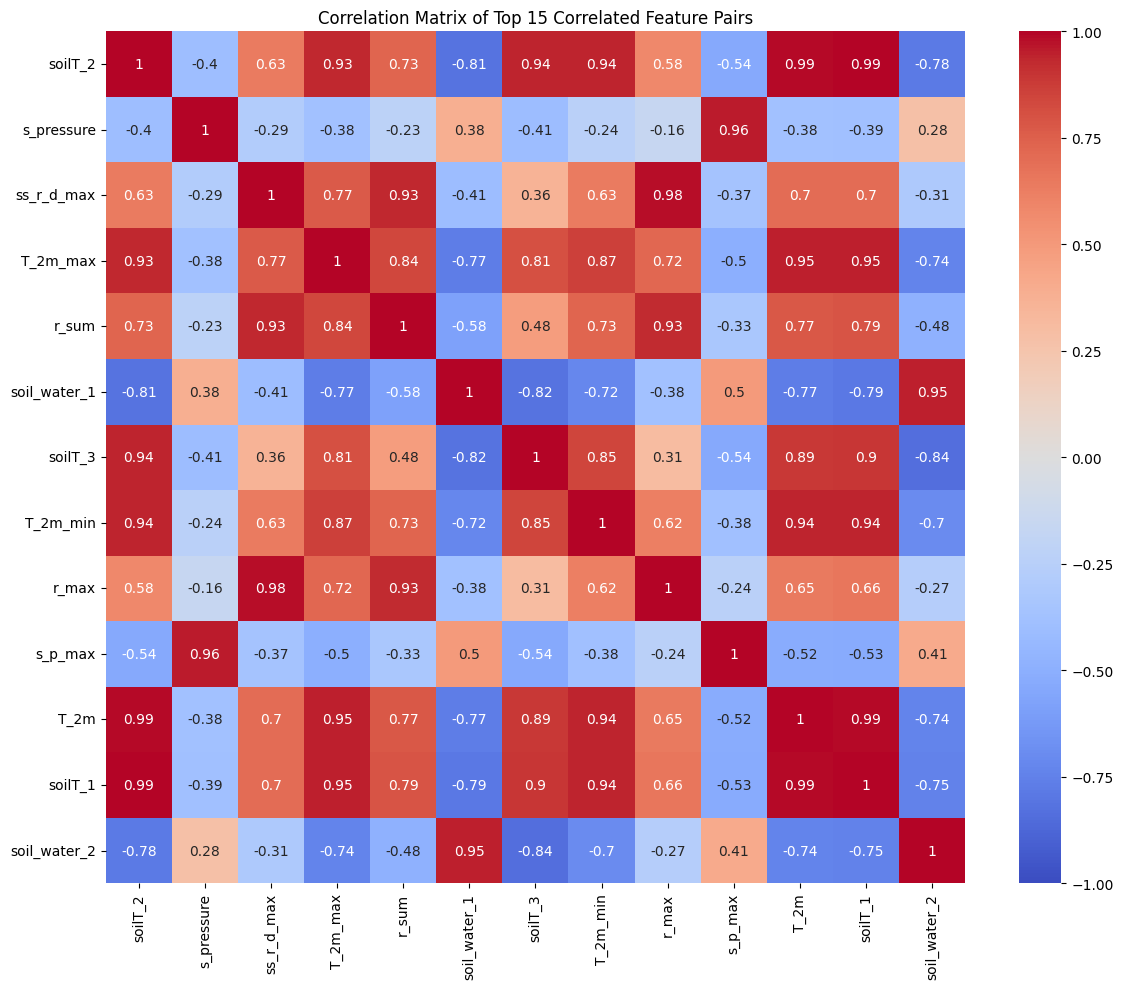

In [ ]:
plot_correlation_matrix(df, n_features=15)

## Scatter Matrix

In [ ]:
def plot_scatter_matrix_highest(data, n_features=5):
    # Calculate the correlation matrix
    corr_matrix = data.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.5
    to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]


    # Sort to_drop by correlation in descending order
    to_drop = sorted(to_drop, key=lambda x: upper[x].max(), reverse=True)

    # Select top n_features
    top_features = to_drop[:n_features]

    # Create a subset of the dataframe with only the top correlated features
    df_subset = data[top_features]

    # Create the scatter matrix plot
    fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(12, 10))

    for i, feature1 in enumerate(top_features):
        for j, feature2 in enumerate(top_features):
            ax = axes[i, j]

            if i != j:
                # Scatter plot
                ax.scatter(df_subset[feature2], df_subset[feature1], alpha=0.5)

                # Calculate and plot trend line
                z = np.polyfit(df_subset[feature2], df_subset[feature1], 1)
                p = np.poly1d(z)
                ax.plot(df_subset[feature2], p(df_subset[feature2]), "r--", alpha=0.8)

                if i == n_features - 1:
                    ax.set_xlabel(feature2)
                if j == 0:
                    ax.set_ylabel(feature1)
            else:
                # Histogram on diagonal
                ax.hist(df_subset[feature1], bins=20)

            # Remove top and right spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            # Remove x ticks for all but bottom row
            if i < n_features - 1:
                ax.set_xticks([])

            # Remove y ticks for all but left column
            if j > 0:
                ax.set_yticks([])

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.suptitle(f'Scatter Matrix of Top {n_features} Correlated Features', y=1.02)
    plt.show()

def plot_scatter_matrix_lowest(data, n_features=5):
    # Calculate the correlation matrix
    corr_matrix = data.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with the lowest correlations
    to_keep = [column for column in upper.columns if any(upper[column] < 0.5)]

    # Sort to_keep by correlation in ascending order
    to_keep = sorted(to_keep, key=lambda x: upper[x].max())

    # Select top n_features with the lowest correlations
    lowest_features = to_keep[:n_features]

    # Create a subset of the dataframe with only the lowest correlated features
    df_subset = data[lowest_features]

    # Create the scatter matrix plot
    fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(12, 10))

    for i, feature1 in enumerate(lowest_features):
        for j, feature2 in enumerate(lowest_features):
            ax = axes[i, j]

            if i != j:
                # Scatter plot
                ax.scatter(df_subset[feature2], df_subset[feature1], alpha=0.5)

                # Calculate and plot trend line
                z = np.polyfit(df_subset[feature2], df_subset[feature1], 1)
                p = np.poly1d(z)
                ax.plot(df_subset[feature2], p(df_subset[feature2]), "r--", alpha=0.8)

                if i == n_features - 1:
                    ax.set_xlabel(feature2)
                if j == 0:
                    ax.set_ylabel(feature1)
            else:
                # Histogram on diagonal
                ax.hist(df_subset[feature1], bins=20)

            # Remove top and right spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            # Remove x ticks for all but bottom row
            if i < n_features - 1:
                ax.set_xticks([])

            # Remove y ticks for all but left column
            if j > 0:
                ax.set_yticks([])

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.suptitle(f'Scatter Matrix of Top {n_features} Least Correlated Features', y=1.02)
    plt.show()

### Highest Features

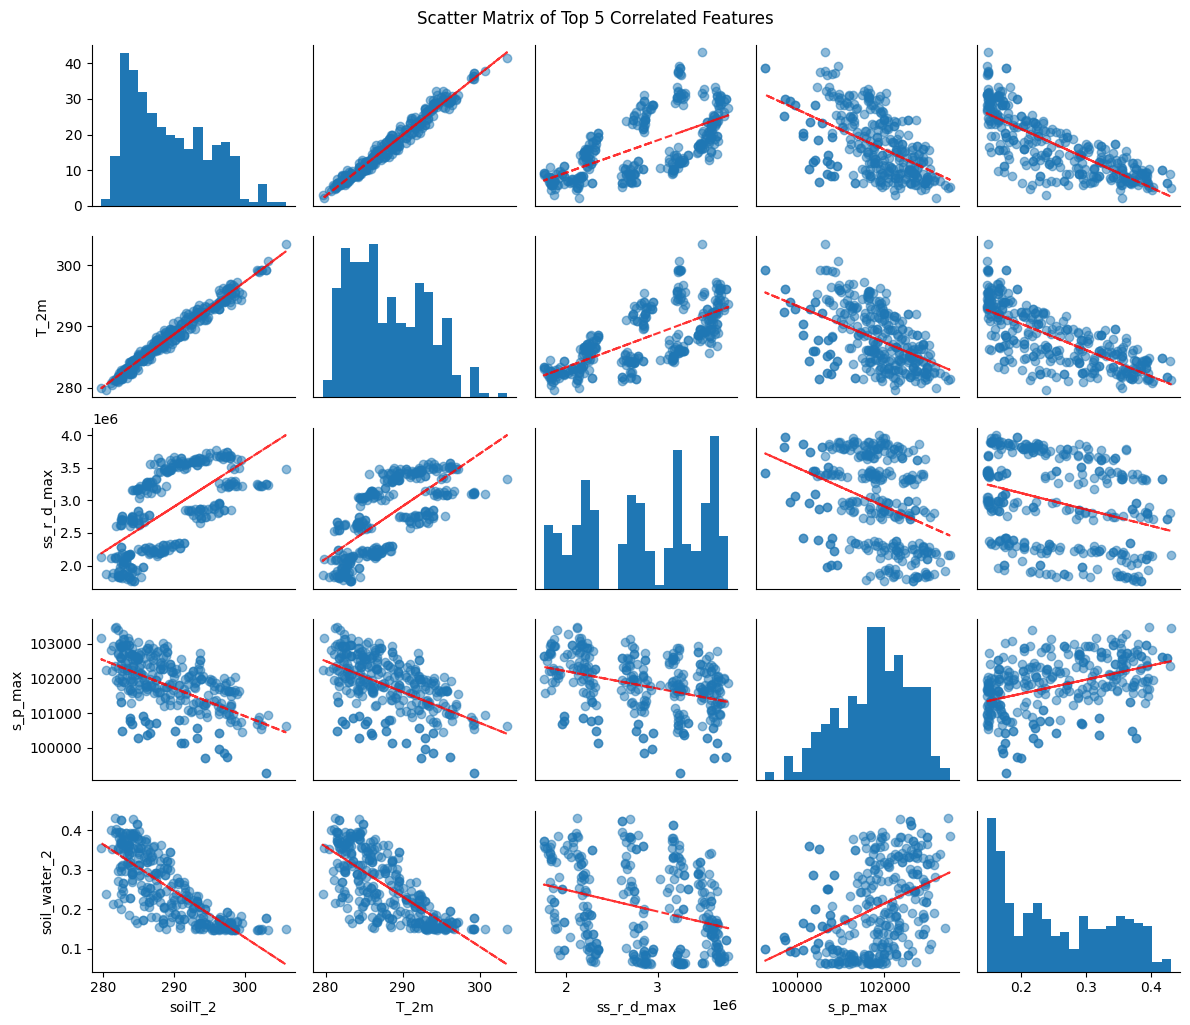

In [ ]:
plot_scatter_matrix_highest(df, n_features=5)

### Lowest Features

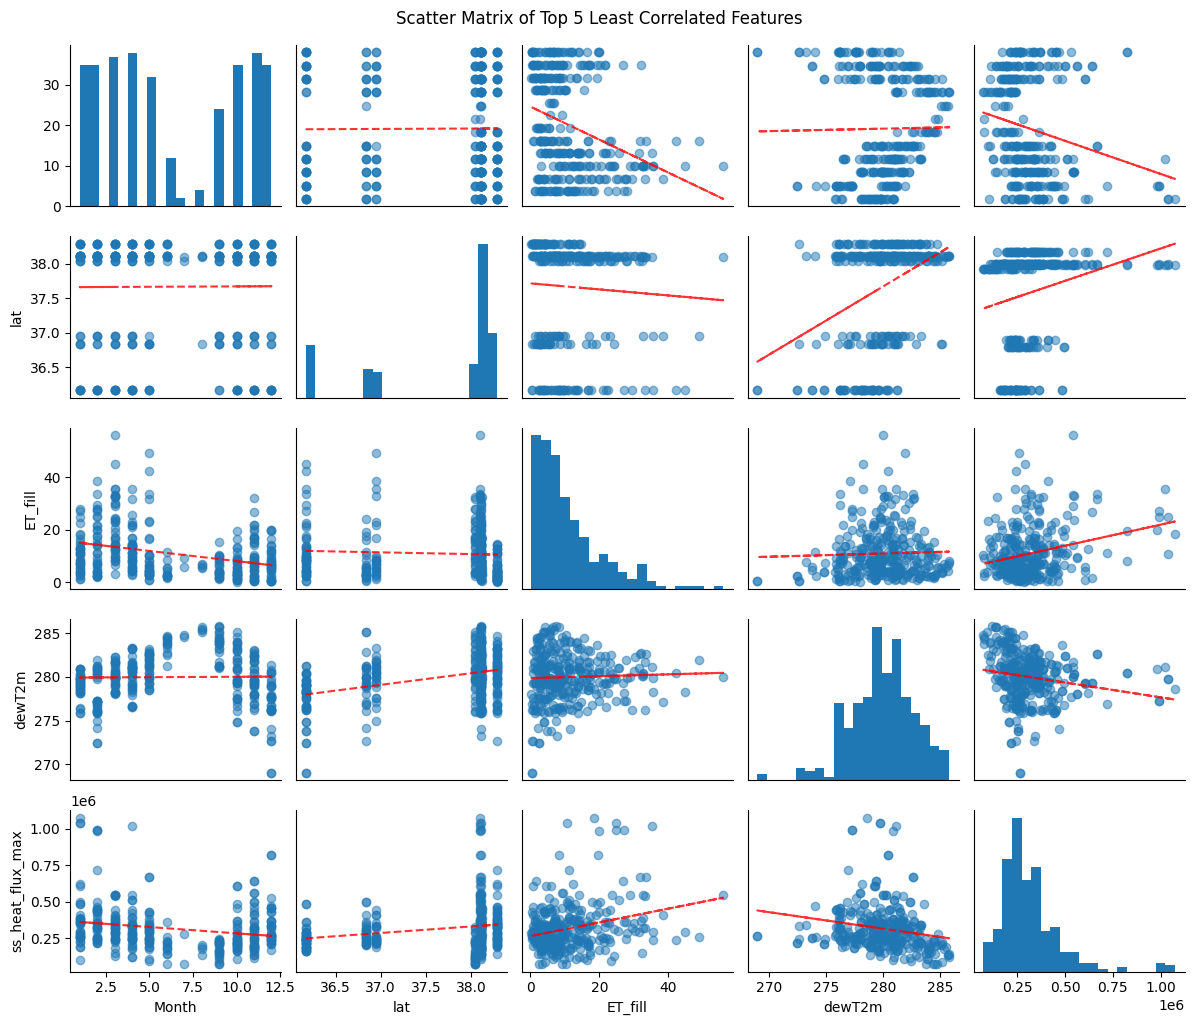

In [ ]:
plot_scatter_matrix_lowest(df, n_features=5)

# RandomForestRegressor

## search best hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [10]:
param_dist_rf = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 20, None],
    'random_state': [22]
}

best_param_rf, best_model_rf = searchcv(
    param_dict =param_dist_rf,
    model = RandomForestRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 22}


In [11]:
def create_model_with_n_features_cv(X, y, n_features):

    # selector = SelectFromModel(
    #     best_model_rf,
    #     max_features=n_features,
    #     threshold=-np.inf
    # )
    selector = RFE(estimator=best_model_rf, n_features_to_select=n_features)
    selector.fit(X, y)
    base_model = RandomForestRegressor(n_estimators=10)

    model = Pipeline(steps=[
        ('feature_selection', selector),
        ('regressor', base_model)
    ])

    selected_features = X.columns[selector.support_]
    cv = KFold(n_splits=10, shuffle=True, random_state=1)


    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

    r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    rmse_scores = -scores

    return model, rmse_scores, r2, selected_features
result = dict()
for n_features in range(2,X.shape[1]+1):
  # n_features = 6
  model, rmse_scores, r2, selected_features = create_model_with_n_features_cv(X, y, n_features)
  print(f"Model trained with top {n_features} features, Cross-Validation RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")
  print(f"Model trained with top {n_features} features, Cross-Validation R2: {np.mean(r2):.3f} ± {np.std(r2):.3f}")
  print(f"Model trained with top {n_features} features, Features selection: {selected_features}")

  result = {
      'Model': [f'RF_{n_features}'],
      'R-squared': [r2],
      'Standard_Deviation for R2': [np.std(r2)],
      'RMSE': [rmse_scores],
      'Standard_Deviation for RMSE': [np.std(rmse_scores)],
      'NRMSE': [rmse_scores / (np.max(y) - np.min(y))],
      'Selected Features': [selected_features]
    }

Model trained with top 2 features, Cross-Validation RMSE: 7.631 ± 1.300
Model trained with top 2 features, Cross-Validation R2: 0.375 ± 0.214
Model trained with top 2 features, Features selection: Index(['ppt', 'surface_net_solar_radiation_max'], dtype='object')
Model trained with top 3 features, Cross-Validation RMSE: 6.217 ± 1.148
Model trained with top 3 features, Cross-Validation R2: 0.553 ± 0.135
Model trained with top 3 features, Features selection: Index(['ppt', 'lat', 'surface_net_solar_radiation_max'], dtype='object')
Model trained with top 4 features, Cross-Validation RMSE: 6.107 ± 1.347
Model trained with top 4 features, Cross-Validation R2: 0.537 ± 0.140
Model trained with top 4 features, Features selection: Index(['ppt', 'lat', 'surface_net_solar_radiation_max',
       'surface_thermal_radiation_downwards_max'],
      dtype='object')
Model trained with top 5 features, Cross-Validation RMSE: 5.945 ± 0.966
Model trained with top 5 features, Cross-Validation R2: 0.565 ± 0.148

In [12]:
df = pd.DataFrame(result)
df

Model                                          R-squared  \
0  RF_48  [0.4294334361792589, 0.5812857276754932, 0.548...   

   Standard_Deviation for R2  \
0                   0.104187   

                                                RMSE  \
0  [4.952358381801033, 6.999376584190133, 8.43459...   

   Standard_Deviation for RMSE  \
0                      1.15361   

                                               NRMSE  \
0  [0.08904363388221914, 0.12584911630319967, 0.1...   

                                   Selected Features  
0  Index(['Year', 'Month', 'ppt', 'lat', 'lon', '...

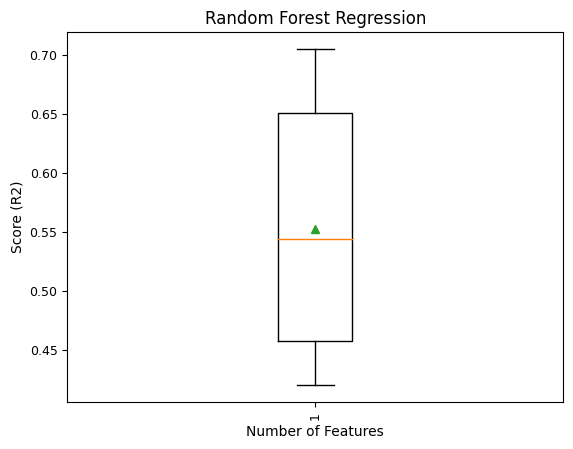

In [ ]:
pyplot.boxplot(
    list(r2),
    labels=[1],
    showmeans=True
)

pyplot.title("Random Forest Regression")
pyplot.xlabel("Number of Features")
pyplot.ylabel("Score (R2)")
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
pyplot.show()

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_mse = cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_rf, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [-10.16614628  -4.50687277  -9.35832866  -5.70008633  -5.28750816]
Mean CV Score_mse: -7.00378843981112
Cross-Validation Scores_r2: [0.13331651 0.64245028 0.30603844 0.58096012 0.39307386]
Mean CV Score_r2: 0.41116784219169655


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed
models = dict()
# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_rf, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    base_model = RandomForestRegressor(n_estimators=10)
    models[str(n_features_to_select)] = Pipeline(steps=[('s',selector),('m',base_model)])

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_rf = {
        'Model': [f'RF_{n_features_to_select}'],
        'best_model': [best_model_rf],
        'best_hyperparam' : [best_param_rf],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    rf = pd.DataFrame(metrics_rf)
    index_result = pd.concat([index_result, rf], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [21:21<00:00, 27.27s/it]


Model                                         best_model  \
0    RF_2  (DecisionTreeRegressor(max_features=1.0, min_s...   
1    RF_3  (DecisionTreeRegressor(max_features=1.0, min_s...   
2    RF_4  (DecisionTreeRegressor(max_features=1.0, min_s...   
3    RF_5  (DecisionTreeRegressor(max_features=1.0, min_s...   
4    RF_6  (DecisionTreeRegressor(max_features=1.0, min_s...   
5    RF_7  (DecisionTreeRegressor(max_features=1.0, min_s...   
6    RF_8  (DecisionTreeRegressor(max_features=1.0, min_s...   
7    RF_9  (DecisionTreeRegressor(max_features=1.0, min_s...   
8   RF_10  (DecisionTreeRegressor(max_features=1.0, min_s...   
9   RF_11  (DecisionTreeRegressor(max_features=1.0, min_s...   
10  RF_12  (DecisionTreeRegressor(max_features=1.0, min_s...   
11  RF_13  (DecisionTreeRegressor(max_features=1.0, min_s...   
12  RF_14  (DecisionTreeRegressor(max_features=1.0, min_s...   
13  RF_15  (DecisionTreeRegressor(max_features=1.0, min_s...   
14  RF_16  (DecisionTreeRegressor(max_features=1.0, min_s...   
15  RF_17  (DecisionTreeRegressor(max_features=1.0, min_s...   
16  RF_18  (DecisionTreeRegressor(max_features=1.0, min_s...   
17  RF_19  (DecisionTreeRegressor(max_features=1.0, min_s...   
18  RF_20  (DecisionTreeRegressor(max_features=1.0, min_s...   
19  RF_21  (DecisionTreeRegressor(max_features=1.0, min_s...   
20  RF_22  (DecisionTreeRegressor(max_features=1.0, min_s...   
21  RF_23  (DecisionTreeRegressor(max_features=1.0, min_s...   
22  RF_24  (DecisionTreeRegressor(max_features=1.0, min_s...   
23  RF_25  (DecisionTreeRegressor(max_features=1.0, min_s...   
24  RF_26  (DecisionTreeRegressor(max_features=1.0, min_s...   
25  RF_27  (DecisionTreeRegressor(max_features=1.0, min_s...   
26  RF_28  (DecisionTreeRegressor(max_features=1.0, min_s...   
27  RF_29  (DecisionTreeRegressor(max_features=1.0, min_s...   
28  RF_30  (DecisionTreeRegressor(max_features=1.0, min_s...   
29  RF_31  (DecisionTreeRegressor(max_features=1.0, min_s...   
30  RF_32  (DecisionTreeRegressor(max_features=1.0, min_s...   
31  RF_33  (DecisionTreeRegressor(max_features=1.0, min_s...   
32  RF_34  (DecisionTreeRegressor(max_features=1.0, min_s...   
33  RF_35  (DecisionTreeRegressor(max_features=1.0, min_s...   
34  RF_36  (DecisionTreeRegressor(max_features=1.0, min_s...   
35  RF_37  (DecisionTreeRegressor(max_features=1.0, min_s...   
36  RF_38  (DecisionTreeRegressor(max_features=1.0, min_s...   
37  RF_39  (DecisionTreeRegressor(max_features=1.0, min_s...   
38  RF_40  (DecisionTreeRegressor(max_features=1.0, min_s...   
39  RF_41  (DecisionTreeRegressor(max_features=1.0, min_s...   
40  RF_42  (DecisionTreeRegressor(max_features=1.0, min_s...   
41  RF_43  (DecisionTreeRegressor(max_features=1.0, min_s...   
42  RF_44  (DecisionTreeRegressor(max_features=1.0, min_s...   
43  RF_45  (DecisionTreeRegressor(max_features=1.0, min_s...   
44  RF_46  (DecisionTreeRegressor(max_features=1.0, min_s...   
45  RF_47  (DecisionTreeRegressor(max_features=1.0, min_s...   
46  RF_48  (DecisionTreeRegressor(max_features=1.0, min_s...   

                                      best_hyperparam  \
0   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
1   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
2   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
3   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
4   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
5   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
6   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
7   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
8   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
9   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
10  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
11  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
12  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
13  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
14  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
15  {'max_depth': N

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_rf26oct.csv")

In [ ]:
def evaluate_model(model, x, y):
    cv = RepeatedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    scores = cross_val_score(
        model,
        x,
        y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        error_score='raise'
    )
    return scores


results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 -7.297 (1.628)
>3 -6.401 (1.264)
>4 -5.992 (1.390)
>5 -5.728 (1.132)
>6 -5.957 (1.209)
>7 -5.999 (1.215)
>8 -5.914 (1.106)
>9 -5.945 (1.066)
>10 -6.009 (1.224)
>11 -5.886 (1.259)
>12 -5.902 (1.148)
>13 -6.022 (1.340)
>14 -5.911 (1.174)
>15 -5.913 (1.197)


In [ ]:
n_features_to_select = 11
selector = RFE(estimator = best_model_rf, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

y_train_pred = selector.predict(X_train)


y_test_pred = selector.predict(X_test)


print('Selected Features: ', selected_features)




Selected Features:  Index(['ppt', 'lat',
       'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'forecast_albedo',
       'leaf_area_index_high_vegetation_min',
       'surface_thermal_radiation_downwards_max', 'total_evaporation_min',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 2.8023782509189203
NSE: 0.9134635335203192
NRMSE: 0.05044332470762999
R-squared: 0.9323629310436725
R: 0.9655894215678176
standard deviation: 7.890189874380215


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.384717297769033
NSE: 0.6610482077162332
NRMSE: 0.12864997362102296
R-squared: 0.6712723271422135
R: 0.8193121060635035
standard deviation: 6.647155084958341


In [ ]:

metrics_rf = {
    'Model':[f'RF_{n_features_to_select}'],
    'R_train':[r_train],
    'R-squared_train':[r2_train],
    'RMSE_train':[rmse_train],
    'NRMSE_train':[nrmse_train],
    'NSE_train':[nse_train],
    'Standard_Deviation_train':[std_train],
    'R_test':[r_test],
    'R-squared_test':[r2_test],
    'RMSE_test':[rmse_test],
    'NRMSE_test':[nrmse_test],
    'NSE_test':[nse_test],
    'Standard_Deviation_test':[std_test],
    'Selected Features':[selected_features]
}

rf = pd.DataFrame(metrics_rf)
index_result = pd.concat([rf, index_result])
index_result

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0  RF_11  0.965589         0.932363    2.802378     0.050443   0.913464   
0  RF_10  0.966644         0.934401    2.765895     0.049787   0.915702   
0   RF_9  0.965218         0.931646    2.790133     0.050223   0.914218   
0   RF_8  0.965237         0.931683    2.772074     0.049898   0.915325   
0   RF_7  0.963311         0.927968    2.830547     0.050950   0.911715   
0   RF_6  0.954328         0.910742    3.105996     0.055908   0.893697   
0   RF_5  0.952295         0.906866    3.174093     0.057134   0.888984   
0   RF_4  0.947469         0.897698    3.264763     0.058766   0.882551   

   Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                  7.890190  0.819312        0.671272   5.384717    0.128650   
0                  7.908339  0.822157        0.675942   5.360771    0.128078   
0                  7.939125  0.820782        0.673683   5.347224    0.127754   
0                  7.980557  0.819109        0.670940   5.365498    0.128191   
0                  7.965239  0.807333        0.651787   5.507990    0.131595   
0                  7.848164  0.774057        0.599164   5.907801    0.141147   
0                  7.800069  0.773389        0.598131   5.920372    0.141448   
0                  7.856380  0.762840        0.581925   5.999975    0.143350   

   NSE_test  Standard_Deviation_test  \
0  0.661048                 6.647155   
0  0.664056                 6.596061   
0  0.665752                 6.786148   
0  0.663463                 6.798966   
0  0.645351                 6.735973   
0  0.591997                 6.382521   
0  0.590258                 6.353941   
0  0.579166                 6.584809   

                                   Selected Features  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'evaporation_from_open_water_sur...  
0  Index(['ppt', 'evaporation_from_open_water_sur...  
0  Index(['ppt', 'evaporation_from_open_water_sur...

In [ ]:
index_result.to_csv('/content/drive/MyDrive/EC_Tower/result/re_indec.csv')

## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = index_result.loc[index_result['Model']== optimum_n_features]["y_test_pred"].values[0].tolist(),
    y = index_result.loc[index_result['Model']== optimum_n_features]["y_test"].values[0].tolist(),
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 50,
    y1 = 50,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# AdaBoostRegressor

## search best hyperparameters

In [ ]:
param_dist_Ada = {'n_estimators': range(5, 16, 5),
                  'learning_rate': np.logspace(-2, 2, 4),
                  'loss': ('linear', 'square', 'exponential')
                  }

best_param_Ada, best_model_Ada = searchcv(param_dict = param_dist_Ada, model = AdaBoostRegressor())

Best parameters found:  {'learning_rate': 0.21544346900318834, 'loss': 'square', 'n_estimators': 10}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Ada, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Ada, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [14.66626189 30.74463821 49.21098924 23.45163763  8.23990993]
Mean CV Score_mse: 25.262687377580107
Cross-Validation Scores_r2: [-0.06746957  0.44766591 -0.29660034 -0.05958653 -3.06758221]
Mean CV Score_r2: -0.6087145464974956


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_Ada, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Ada = {
        'Model': [f'Ada_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    Ada = pd.DataFrame(metrics_Ada)
    index_result = pd.concat([index_result, Ada], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 13/13 [00:55<00:00,  4.28s/it]


Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0     RF_4  0.960306         0.922188    1.678879     0.082200   0.900638   
1     RF_6  0.960609         0.922769    1.645619     0.080572   0.904536   
2     RF_8  0.958491         0.918706    1.724637     0.084441   0.895148   
3    RF_10  0.959529         0.920695    1.753801     0.085869   0.891572   
4    RF_12  0.959589         0.920811    1.777177     0.087013   0.888662   
5    RF_14  0.958652         0.919014    1.831843     0.089690   0.881707   
6    RF_16  0.952828         0.907882    1.938753     0.094924   0.867497   
7    RF_18  0.961792         0.925043    1.906236     0.093332   0.871904   
8    RF_20  0.957934         0.917637    1.904563     0.093250   0.872129   
9    RF_22  0.956340         0.914586    1.953835     0.095663   0.865427   
10   RF_24  0.951766         0.905858    2.023420     0.099070   0.855671   
11   RF_26  0.952559         0.907369    2.009519     0.098389   0.857647   
12   RF_28  0.955796         0.913546    1.973483     0.096625   0.862707   
13   Ada_4  0.929965         0.864835    1.961841     0.096055   0.864322   
14   Ada_6  0.955379         0.912749    1.603202     0.078495   0.909394   
15   Ada_8  0.958088         0.917933    1.553614     0.076067   0.914912   
16  Ada_10  0.960159         0.921905    1.517087     0.074279   0.918866   
17  Ada_12  0.963714         0.928744    1.440122     0.070510   0.926889   
18  Ada_14  0.968298         0.937600    1.386437     0.067882   0.932239   
19  Ada_16  0.958278         0.918297    1.648790     0.080727   0.904168   
20  Ada_18  0.971058         0.942953    1.301018     0.063700   0.940331   
21  Ada_20  0.955664         0.913294    1.616305     0.079137   0.907907   
22  Ada_22  0.973989         0.948654    1.251955     0.061298   0.944747   
23  Ada_24  0.961902         0.925256    1.481288     0.072526   0.922650   
24  Ada_26  0.963188         0.927731    1.487182     0.072815   0.922033   
25  Ada_28  0.980545         0.961468    1.092020     0.053467   0.957962   

    Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                   4.332838  0.567597        0.322167   4.685433    0.213348   
1                   4.397238  0.573524        0.328930   4.660939    0.212232   
2                   4.287820  0.576165        0.331966   4.594000    0.209184   
3                   4.204088  0.525961        0.276635   4.842102    0.220481   
4                   4.158110  0.506786        0.256832   4.869327    0.221721   
5                   4.079497  0.543731        0.295644   4.831508    0.219999   
6                   4.010701  0.452268        0.204547   5.089851    0.231762   
7                   3.902314  0.463250        0.214600   5.099659    0.232209   
8                   3.968662  0.518410        0.268749   4.951396    0.225458   
9                   3.914768  0.510676        0.260790   4.971840    0.226389   
10                  3.880536  0.445544        0.198509   5.198224    0.236697   
11                  3.887407  0.429795        0.184723   5.220432    0.237708   
12                  3.895258  0.478770        0.229221   5.074168    0.231048   
13                  4.888316  0.162867        0.026526   7.284234    0.331682   
14                  4.799928  0.409123        0.167381   5.657885    0.257627   
15                  4.848928  0.076826        0.005902   6.876814    0.313130   
16                  4.821196  0.321928        0.103638   5.885889    0.268009   
17                  5.041797  0.521758        0.272231   5.322521    0.242357   
18                  4.850641  0.319728        0.102226   6.292884    0.286542   
19                  4.540154  0.425105        0.180714   5.520582    0.251375   
20                  4.906183  0.306265        0.093799   6.262379    0.285153   
21                  4.802749  0.150038        0.022511   7.584464    0.345353   
22                  4.888242  0.330121        0.108980   5.835

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Ada.csv")

In [ ]:
n_features_to_select = 5
selector = RFE(estimator = best_model_Ada, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

selector.fit(X_train, y_train)

y_train_pred = selector.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = selector.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'lat', 'evaporation_from_the_top_of_canopy_sum',
       'surface_thermal_radiation_downwards_max', 'total_evaporation_min'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.352778933260823
NSE: 0.6842784214811545
NRMSE: 0.09635100676723353
R-squared: 0.6920944914787589
R: 0.8319221667191943
standard deviation: 7.163444906289869


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.8651229783273315
NSE: 0.5978701005206921
NRMSE: 0.14012767518147834
R-squared: 0.6103267792068713
R: 0.7812341385313825
standard deviation: 6.230542686239689


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# BaggingRegressor

## search best hyperparameters

In [ ]:
param_dist_Bagging = {'n_estimators': [5, 10, 20, 50, 75],
                      'max_samples' : [0.2, 0.5, 0.75, 1],
                      'max_features': [0.5, 0.75, 1],
                      'bootstrap':[True, False]}



best_param_Bagging, best_model_Bagging = searchcv(
    param_dict = param_dist_Bagging,
    model = BaggingRegressor())

Best parameters found:  {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.2, 'n_estimators': 10}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [25.6310814  55.44080256 61.45642564 19.74774813  9.89112529]
Mean CV Score_mse: 34.43343660218089
Cross-Validation Scores_r2: [ 0.10829756 -0.27996629 -0.20884208  0.05988535 -0.76731863]
Mean CV Score_r2: -0.21758881871048502


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_Bagging)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_bagging = {
        'Model': [f'Bagging_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    bagging = pd.DataFrame(metrics_bagging)
    index_result = pd.concat([index_result, bagging], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  15%|█▌        | 2/13 [00:00<00:00, 12.28it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


Selected Features:  Index(['ppt', 'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Selected Features:  Index(['ppt', 'leaf_area_index_low_vegetation_min',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_2_min'],
      dtype='object')
Selected Features:  Index(['ppt', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max',
       'leaf_area_index_low_vegetation_min', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  31%|███       | 4/13 [00:00<00:00, 12.81it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  46%|████▌     | 6/13 [00:00<00:00, 12.89it/s]

Selected Features:  Index(['ppt', 'leaf_area_index_high_vegetation_min',
       'leaf_area_index_low_vegetation', 'leaf_area_index_low_vegetation_max',
       'leaf_area_index_low_vegetation_min', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'leaf_area_index_high_vegetation',
       'leaf_area_index_high_vegetation_min', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max',
       'leaf_area_index_low_vegetation_min', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'leaf_area_index

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  62%|██████▏   | 8/13 [00:00<00:00, 12.93it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'leaf_area_index_high_vegetation',
       'leaf_area_index_high_vegetation_max',
       'leaf_area_index_high_vegetation_min', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max',
       'leaf_area_index_low_vegetation_min', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'u_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'pdsi'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'lake_ice_temperature',
       'leaf_area_index_high_vegetation',
       'leaf_area_index_high_vegetation_max',
       'leaf_area_index_high_vegetation_min', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max',
       'leaf_area

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  77%|███████▋  | 10/13 [00:00<00:00, 13.06it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  92%|█████████▏| 12/13 [00:00<00:00, 12.92it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'lake_ice_temperature',
       'leaf_area_index_high_vegetation',
       'leaf_area_index_high_vegetation_max',
       'leaf_area_index_high_vegetation_min', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max',
       'leaf_area_index_low_vegetation_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'surface_sensible_heat_flux_max',
       'total_evaporation_min', 'total_evaporation_sum',
       'u_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min',
       'volumetric_soil_water_layer_3_min', 'pdsi'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'lake_ice_temperature',
       'leaf_ar

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress: 100%|██████████| 13/13 [00:01<00:00, 12.85it/s]


Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'forecast_albedo_max',
       'lake_ice_temperature', 'lake_mix_layer_temperature',
       'leaf_area_index_high_vegetation',
       'leaf_area_index_high_vegetation_max',
       'leaf_area_index_high_vegetation_min', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max',
       'leaf_area_index_low_vegetation_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'total_evaporation_min',
       'total_evaporation_sum', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_w

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0         RF_4  0.960306         0.922188    1.678879     0.082200   0.900638   
1         RF_6  0.960609         0.922769    1.645619     0.080572   0.904536   
2         RF_8  0.958491         0.918706    1.724637     0.084441   0.895148   
3        RF_10  0.959529         0.920695    1.753801     0.085869   0.891572   
4        RF_12  0.959589         0.920811    1.777177     0.087013   0.888662   
5        RF_14  0.958652         0.919014    1.831843     0.089690   0.881707   
6        RF_16  0.952828         0.907882    1.938753     0.094924   0.867497   
7        RF_18  0.961792         0.925043    1.906236     0.093332   0.871904   
8        RF_20  0.957934         0.917637    1.904563     0.093250   0.872129   
9        RF_22  0.956340         0.914586    1.953835     0.095663   0.865427   
10       RF_24  0.951766         0.905858    2.023420     0.099070   0.855671   
11       RF_26  0.952559         0.907369    2.009519     0.098389   0.857647   
12       RF_28  0.955796         0.913546    1.973483     0.096625   0.862707   
13       Ada_4  0.929965         0.864835    1.961841     0.096055   0.864322   
14       Ada_6  0.955379         0.912749    1.603202     0.078495   0.909394   
15       Ada_8  0.958088         0.917933    1.553614     0.076067   0.914912   
16      Ada_10  0.960159         0.921905    1.517087     0.074279   0.918866   
17      Ada_12  0.963714         0.928744    1.440122     0.070510   0.926889   
18      Ada_14  0.968298         0.937600    1.386437     0.067882   0.932239   
19      Ada_16  0.958278         0.918297    1.648790     0.080727   0.904168   
20      Ada_18  0.971058         0.942953    1.301018     0.063700   0.940331   
21      Ada_20  0.955664         0.913294    1.616305     0.079137   0.907907   
22      Ada_22  0.973989         0.948654    1.251955     0.061298   0.944747   
23      Ada_24  0.961902         0.925256    1.481288     0.072526   0.922650   
24      Ada_26  0.963188         0.927731    1.487182     0.072815   0.922033   
25      Ada_28  0.980545         0.961468    1.092020     0.053467   0.957962   
26   Bagging_4  0.721258         0.520213    3.910546     0.191466   0.460915   
27   Bagging_6  0.755066         0.570124    3.579781     0.175271   0.548253   
28   Bagging_8  0.784440         0.615346    3.677397     0.180051   0.523280   
29  Bagging_10  0.772038         0.596042    3.867525     0.189360   0.472711   
30  Bagging_12  0.761788         0.580321    3.589690     0.175757   0.545749   
31  Bagging_14  0.800718         0.641150    3.458953     0.169355   0.578234   
32  Bagging_16  0.722236         0.521625    3.819991     0.187032   0.485593   
33  Bagging_18  0.730265         0.533287    3.793315     0.185726   0.492753   
34  Bagging_20  0.704817         0.496767    3.865468     0.189259   0.473272   
35  Bagging_22  0.689808         0.475835    4.127593     0.202093   0.399413   
36  Bagging_24  0.594348         0.353249    4.468600     0.218789   0.296077   
37  Bagging_26  0.763010         0.582185    3.699854     0.181150   0.517440   
38  Bagging_28  0.685519         0.469936    4.039717     0.197791   0.424714   

    Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                   4.332838  0.567597        0.322167   4.685433    0.213348   
1                   4.397238  0.573524        0.328930   4.660939    0.212232   
2                   4.287820  0.576165        0.331966   4.594000    0.209184   
3                   4.204088  0.525961        0.276635   4.842102    0.220481   
4                   4.158110  0.506786        0.256832   4.869327    0.221721   
5                   4.079497  0.543731        0.295644   4.831508    0.219999   
6                   4.010701  0.452268        0.204547   5.089851    0.231762   
7                   3.902314  0.463250        0.214600   5.099659    0.232209   
8                   3.968662  0.518410 

In [ ]:
n_features_to_select = 4


# Create a pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_Bagging)
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)


# Get the boolean mask of selected features
selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

# Get the feature names
feature_names = X.columns
# Print the selected feature names
selected_features = feature_names[selected_features_mask]


y_test_pred = pipeline.predict(X_test)

print('Selected Features: ', selected_features)


Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning:

invalid value encountered in sqrt



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 2.2260649628015026
NSE: 0.9453963947351801
NRMSE: 0.04006957936604515
R-squared: 0.964537651619056
R: 0.9821087778953287
standard deviation: 8.038294843076853


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 7.451474228169324
NSE: 0.35092254097981734
NRMSE: 0.17802828075837726
R-squared: 0.3553579878600087
R: 0.5961191054311283
standard deviation: 6.073300737748699


In [ ]:

metrics_bagging = {
    'Model':['Bagging_4'],
    'R_train':[r_train],
    'R-squared_train':[r2_train],
    'RMSE_train':[rmse_train],
    'NRMSE_train':[nrmse_train],
    'NSE_train':[nse_train],
    'Standard_Deviation_train':[std_train],
    'R_test':[r_test],
    'R-squared_test':[r2_test],
    'RMSE_test':[rmse_test],
    'NRMSE_test':[nrmse_test],
    'NSE_test':[nse_test],
    'Standard_Deviation_test':[std_test]
}

index_result = pd.DataFrame(metrics_bagging)
index_result

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0  Bagging_4  0.982109         0.964538    2.226065      0.04007   0.945396   

   Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                  8.038295  0.596119        0.355358   7.451474    0.178028   

   NSE_test  Standard_Deviation_test  
0  0.350923                 6.073301

## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# ExtraTreesRegressor

## search best hyperparameters

In [ ]:
param_dist_ExtraTrees = {
    'n_estimators': [50,75,100],
    "max_features": ["auto", "sqrt", "log2"],
    'max_depth': [2,3,4],
    'min_samples_split': [2,4,8],
    "min_impurity_decrease": [0, 0.1, 0.2],
    "bootstrap": [False]
}

best_param_ExtraTrees, best_model_ExtraTrees = searchcv(param_dict = param_dist_ExtraTrees, model = ExtraTreesRegressor())

Best parameters found:  {'bootstrap': False, 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.1, 'min_samples_split': 8, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
308 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [30.52252103 27.30021065 49.55711591 19.29607644  4.70100923]
Mean CV Score_mse: 26.275386653352985
Cross-Validation Scores_r2: [-0.13074735  0.18200806 -0.04483362  0.16021594  0.13476629]
Mean CV Score_r2: 0.06028186391314918


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ExtraTrees, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Etratrees = {
        'Model': [f'Etratrees_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    Etratrees = pd.DataFrame(metrics_Etratrees)
    index_result = pd.concat([index_result, Etratrees], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 13/13 [03:15<00:00, 15.02s/it]


Model   R_train  R-squared_train  RMSE_train  NRMSE_train  \
0           RF_4  0.960306         0.922188    1.678879     0.082200   
1           RF_6  0.960609         0.922769    1.645619     0.080572   
2           RF_8  0.958491         0.918706    1.724637     0.084441   
3          RF_10  0.959529         0.920695    1.753801     0.085869   
4          RF_12  0.959589         0.920811    1.777177     0.087013   
5          RF_14  0.958652         0.919014    1.831843     0.089690   
6          RF_16  0.952828         0.907882    1.938753     0.094924   
7          RF_18  0.961792         0.925043    1.906236     0.093332   
8          RF_20  0.957934         0.917637    1.904563     0.093250   
9          RF_22  0.956340         0.914586    1.953835     0.095663   
10         RF_24  0.951766         0.905858    2.023420     0.099070   
11         RF_26  0.952559         0.907369    2.009519     0.098389   
12         RF_28  0.955796         0.913546    1.973483     0.096625   
13         Ada_4  0.929965         0.864835    1.961841     0.096055   
14         Ada_6  0.955379         0.912749    1.603202     0.078495   
15         Ada_8  0.958088         0.917933    1.553614     0.076067   
16        Ada_10  0.960159         0.921905    1.517087     0.074279   
17        Ada_12  0.963714         0.928744    1.440122     0.070510   
18        Ada_14  0.968298         0.937600    1.386437     0.067882   
19        Ada_16  0.958278         0.918297    1.648790     0.080727   
20        Ada_18  0.971058         0.942953    1.301018     0.063700   
21        Ada_20  0.955664         0.913294    1.616305     0.079137   
22        Ada_22  0.973989         0.948654    1.251955     0.061298   
23        Ada_24  0.961902         0.925256    1.481288     0.072526   
24        Ada_26  0.963188         0.927731    1.487182     0.072815   
25        Ada_28  0.980545         0.961468    1.092020     0.053467   
26     Bagging_4  0.721258         0.520213    3.910546     0.191466   
27     Bagging_6  0.755066         0.570124    3.579781     0.175271   
28     Bagging_8  0.784440         0.615346    3.677397     0.180051   
29    Bagging_10  0.772038         0.596042    3.867525     0.189360   
30    Bagging_12  0.761788         0.580321    3.589690     0.175757   
31    Bagging_14  0.800718         0.641150    3.458953     0.169355   
32    Bagging_16  0.722236         0.521625    3.819991     0.187032   
33    Bagging_18  0.730265         0.533287    3.793315     0.185726   
34    Bagging_20  0.704817         0.496767    3.865468     0.189259   
35    Bagging_22  0.689808         0.475835    4.127593     0.202093   
36    Bagging_24  0.594348         0.353249    4.468600     0.218789   
37    Bagging_26  0.763010         0.582185    3.699854     0.181150   
38    Bagging_28  0.685519         0.469936    4.039717     0.197791   
39   Etratrees_4  0.902089         0.813764    2.782512     0.136236   
40   Etratrees_6  0.900596         0.811074    2.839593     0.139031   
41   Etratrees_8  0.925769         0.857048    2.407725     0.117886   
42  Etratrees_10  0.929329         0.863653    2.455189     0.120210   
43  Etratrees_12  0.924250         0.854239    2.409234     0.117960   
44  Etratrees_14  0.925643         0.856815    2.416652     0.118323   
45  Etratrees_16  0.929607         0.864170    2.309764     0.113089   
46  Etratrees_18  0.934059         0.872466    2.284056     0.111831   
47  Etratrees_20  0.932241         0.869073    2.374778     0.116273   
48  Etratrees_22  0.929657         0.864263    2.319748     0.113578   
49  Etratrees_24  0.938212         0.880242    2.288774     0.112062   
50  Etratrees_26  0.925301         0.856183    2.438850     0.119410   
51  Etratrees_28  0.929825         0.864574    2.334519     0.114301   

    NSE_train  Standard_Deviation_train    R_test  R-squared_test  RMSE_test  \
0    0.900638                  4.332838  0.567597        0.322167   4.685433   
1    0.904536                  4.3

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Extratrees.csv")

In [ ]:
selector = RFE(estimator = best_model_ExtraTrees, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ExtraTrees.fit(X_train, y_train)

y_train_pred = best_model_ExtraTrees.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ExtraTrees.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1_max'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.91084756793779
NSE: 0.615013793565833
NRMSE: 0.10639634498627056
R-squared: 0.7202123619662433
R: 0.8486532636867917
standard deviation: 4.994767714097143


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 7.0619192084579945
NSE: 0.4170146930288432
NRMSE: 0.16872115463857829
R-squared: 0.47857435296813366
R: 0.691790685806143
standard deviation: 4.114453415046351


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# GradientBoostingRegressor

## search best hyperparameters

In [ ]:
param_dist_GB = {'learning_rate': [0.03],
                 'subsample': [0.5, 0.6],
                 'n_estimators': list(range(100, 1200, 100)),
                 'max_depth': [4,5,6,7,8,9]}



best_param_GB, best_model_GB = searchcv(param_dict = param_dist_GB, model = GradientBoostingRegressor())

Best parameters found:  {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 600, 'subsample': 0.6}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_GB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_GB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [29.30848669 20.56650065 51.25959554 19.66925424  3.73784242]
Mean CV Score_mse: 24.90833590712805
Cross-Validation Scores_r2: [ 0.08531147  0.46178062 -0.14974997  0.07202815 -0.05643085]
Mean CV Score_r2: 0.08258788316888725


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_GB, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_GB = {
        'Model': [f'GB_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    GB = pd.DataFrame(metrics_GB)
    index_result = pd.concat([index_result, GB], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:  31%|███       | 4/13 [13:35<30:35, 203.92s/it]


KeyboardInterrupt: 

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_GB.csv")

In [ ]:
selector = RFE(estimator = best_model_GB, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]


best_model_GB.fit(X_train, y_train)

y_train_pred = best_model_GB.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_GB.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum', 'forecast_albedo_min',
       'total_evaporation_min'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.5993318228918726
NSE: 0.9960419586541964
NRMSE: 0.010788083207481761
R-squared: 0.9965809082435252
R: 0.9982889903447424
standard deviation: 9.289022089502868


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.609223766549611
NSE: 0.6321949813254348
NRMSE: 0.1340138116257288
R-squared: 0.6345543114937998
R: 0.7965891735981602
standard deviation: 7.0411459526422275


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# HistGradientBoostingRegressor

## search best hyperparameters

In [ ]:
param_dist_HGB = {'loss': ['least_squares', 'poisson'],
                  'learning_rate': [0.1, 0.01, 0.8],
                  'max_iter': [50, 100, 200]}



best_param_HGB, best_model_HGB = searchcv(param_dict = param_dist_HGB, model = HistGradientBoostingRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters found:  {'learning_rate': 0.1, 'loss': 'poisson', 'max_iter': 100}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_HGB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_HGB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [101.40034735  32.38629234  77.68591173  51.55569735  32.72274144]
Mean CV Score_mse: 59.150198041477026
Cross-Validation Scores_r2: [0.14967048 0.42990521 0.38442483 0.33508037 0.28963194]
Mean CV Score_r2: 0.3177425653502834


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_HGB)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_HGB = {
        'Model': [f'HGB_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    HGB = pd.DataFrame(metrics_HGB)
    index_result = pd.concat([index_result, HGB], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:   8%|▊         | 1/13 [00:00<00:01,  7.01it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  15%|█▌        | 2/13 [00:00<00:01,  6.85it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  23%|██▎       | 3/13 [00:00<00:01,  6.75it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  31%|███       | 4/13 [00:00<00:01,  6.53it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  38%|███▊      | 5/13 [00:00<00:01,  6.36it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  46%|████▌     | 6/13 [00:00<00:01,  6.33it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  54%|█████▍    | 7/13 [00:01<00:01,  5.91it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  62%|██████▏   | 8/13 [00:01<00:00,  5.95it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4_max', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
      

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  69%|██████▉   | 9/13 [00:01<00:00,  5.95it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  77%|███████▋  | 10/13 [00:01<00:00,  5.78it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  85%|████████▍ | 11/13 [00:01<00:00,  5.76it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  92%|█████████▏| 12/13 [00:01<00:00,  5.77it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'total_evaporation_sum', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_fr

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress: 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]


Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_3', 'soil_temperature_level_3_max',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'total_evaporation_sum', 'total_precipitation_sum',
       'u_component_of_wind_10m_min', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      d

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0    Bagging_4  0.985121         0.970463    2.087363     0.037573   0.951989   
1    Bagging_6  0.984607         0.969451    2.013353     0.036241   0.955333   
2    Bagging_8  0.983961         0.968179    1.960207     0.035284   0.957660   
3   Bagging_10  0.985708         0.971619    2.075039     0.037351   0.952554   
4   Bagging_12  0.982945         0.966181    2.032837     0.036591   0.954464   
5   Bagging_14  0.984718         0.969669    1.988117     0.035786   0.956446   
6   Bagging_16  0.983364         0.967005    2.024096     0.036434   0.954855   
7   Bagging_18  0.984063         0.968381    2.035324     0.036636   0.954353   
8   Bagging_20  0.982102         0.964524    2.091386     0.037645   0.951804   
9   Bagging_22  0.984589         0.969415    1.938079     0.034886   0.958611   
10  Bagging_24  0.985006         0.970237    1.923460     0.034623   0.959233   
11  Bagging_26  0.983484         0.967240    2.035779     0.036644   0.954333   
12  Bagging_28  0.983966         0.968190    1.968514     0.035434   0.957301   
13        GB_4  0.995502         0.991025    0.940764     0.016934   0.990248   
14        GB_6  0.995383         0.990787    0.958278     0.017249   0.989881   
15        GB_8  0.997808         0.995622    0.658215     0.011848   0.995226   
16       GB_10  0.997970         0.995943    0.632957     0.011393   0.995585   
17       GB_12  0.998449         0.996901    0.554197     0.009976   0.996616   
18       GB_14  0.998107         0.996218    0.616833     0.011103   0.995807   
19       GB_16  0.998848         0.997697    0.475441     0.008558   0.997509   
20       GB_18  0.998332         0.996667    0.574238     0.010336   0.996366   
21       GB_20  0.998181         0.996365    0.596192     0.010732   0.996083   
22       GB_22  0.997911         0.995826    0.643306     0.011580   0.995440   
23       GB_24  0.998280         0.996564    0.583315     0.010500   0.996251   
24       GB_26  0.998529         0.997060    0.542027     0.009757   0.996763   
25       GB_28  0.998348         0.996699    0.571779     0.010292   0.996398   
26       HGB_4  0.923012         0.851951    3.851119     0.069321   0.836575   
27       HGB_6  0.933892         0.872154    3.570818     0.064275   0.859498   
28       HGB_8  0.951206         0.904792    3.106650     0.055920   0.893652   
29      HGB_10  0.955128         0.912270    2.979537     0.053632   0.902176   
30      HGB_12  0.958958         0.919601    2.852505     0.051346   0.910340   
31      HGB_14  0.963312         0.927970    2.724303     0.049038   0.918218   
32      HGB_16  0.969174         0.939297    2.479783     0.044637   0.932240   
33      HGB_18  0.973183         0.947085    2.307357     0.041533   0.941336   
34      HGB_20  0.973755         0.948198    2.268594     0.040835   0.943290   
35      HGB_22  0.975501         0.951603    2.211895     0.039815   0.946089   
36      HGB_24  0.974842         0.950316    2.231350     0.040165   0.945137   
37      HGB_26  0.978217         0.956909    2.086089     0.037550   0.952047   
38      HGB_28  0.979123         0.958682    2.034125     0.036615   0.954407   

    Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                   8.090043  0.651716        0.424734   7.021718    0.167761   
1                   8.254030  0.703402        0.494775   6.582985    0.157279   
2                   8.403582  0.717038        0.514143   6.451146    0.154129   
3                   8.075862  0.713394        0.508931   6.490773    0.155076   
4                   8.335945  0.713346        0.508862   6.494327    0.155160   
5                   8.287075  0.687331        0.472423   6.730632    0.160806   
6                   8.323831  0.704157        0.495837   6.573777    0.157059   
7                   8.249328  0.714506        0.510519   6.487096    0.154988   
8                   8.288452  0.707199 

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_HGB.csv")

In [ ]:
# selector = RFE(estimator = best_model_HGB, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]


best_model_HGB.fit(X_train, y_train)

y_train_pred = best_model_HGB.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_HGB.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.8792833633226798
NSE: 0.9914807107787356
NRMSE: 0.015827262501612312
R-squared: 0.9921214031705673
R: 0.9960529118327838
standard deviation: 9.247633129329303


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.344484052080223
NSE: 0.6660944091743636
NRMSE: 0.1276887335576499
R-squared: 0.6764229026632415
R: 0.8224493313653075
standard deviation: 7.593548796924162


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Multi-layer Perceptron regressor

## search best hyperparameters

In [ ]:
param_dist_MLPR = {
    'hidden_layer_sizes': [25, 50, 100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

best_param_MLPR, best_model_MLPR = searchcv(param_dict = param_dist_MLPR, model = MLPRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1114: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-Validation Scores_mse: [100.23086164  71.35978152  97.33513097  45.67791154  39.12994172]
Mean CV Score_mse: 70.7467254772246


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores_r2: [ 0.23031925 -0.50688146  0.18905523  0.27016428  0.18003571]
Mean CV Score_r2: 0.07253860035065204


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_MLPR)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_MLPR = {
        'Model': [f'MLPR_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    MLPR = pd.DataFrame(metrics_MLPR)
    index_result = pd.concat([index_result, MLPR], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:   8%|▊         | 1/13 [00:00<00:04,  2.45it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  15%|█▌        | 2/13 [00:00<00:03,  3.03it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  23%|██▎       | 3/13 [00:00<00:02,  3.34it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  31%|███       | 4/13 [00:01<00:02,  3.60it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  38%|███▊      | 5/13 [00:01<00:02,  3.52it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  46%|████▌     | 6/13 [00:01<00:02,  3.40it/s]

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  54%|█████▍    | 7/13 [00:02<00:01,  3.25it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4_max', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  62%|██████▏   | 8/13 [00:02<00:01,  3.36it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-10-4f8d4eaf258a>:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  69%|██████▉   | 9/13 [00:02<00:01,  3.54it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  77%|███████▋  | 10/13 [00:03<00:01,  1.68it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  85%|████████▍ | 11/13 [00:05<00:01,  1.18it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'total_evaporation_sum', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      dtype='object')


<ipython-input-10-4f8d4eaf258a>:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  92%|█████████▏| 12/13 [00:06<00:00,  1.17it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'total_evaporation_sum', 'total_precipitation_sum',
       'u_component_of_wind_10m_min', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
<ipython-input-10-4f8d4eaf258a>:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_3', 'soil_temperature_level_3_max',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'total_evaporation_sum', 'total_precipitation_sum',
       'u_component_of_wind_10m_min', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      d

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0    Bagging_4  0.985121         0.970463    2.087363     0.037573   0.951989   
1    Bagging_6  0.984607         0.969451    2.013353     0.036241   0.955333   
2    Bagging_8  0.983961         0.968179    1.960207     0.035284   0.957660   
3   Bagging_10  0.985708         0.971619    2.075039     0.037351   0.952554   
4   Bagging_12  0.982945         0.966181    2.032837     0.036591   0.954464   
..         ...       ...              ...         ...          ...        ...   
86     MLPR_20       NaN              NaN    9.531347     0.171566  -0.001046   
87     MLPR_22  0.248322         0.061664    9.235917     0.166248   0.060048   
88     MLPR_24  0.253580         0.064303    9.219656     0.165956   0.063355   
89     MLPR_26  0.105571         0.011145    9.515808     0.171286   0.002215   
90     MLPR_28  0.105571         0.011145    9.515076     0.171273   0.002368   

    Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0               8.090043e+00  0.651716        0.424734   7.021718    0.167761   
1               8.254030e+00  0.703402        0.494775   6.582985    0.157279   
2               8.403582e+00  0.717038        0.514143   6.451146    0.154129   
3               8.075862e+00  0.713394        0.508931   6.490773    0.155076   
4               8.335945e+00  0.713346        0.508862   6.494327    0.155160   
..                       ...       ...             ...        ...         ...   
86              1.953993e-14       NaN             NaN   9.253902    0.221091   
87              1.987089e+00  0.085367        0.007288   9.315283    0.222558   
88              2.133847e+00  0.139923        0.019578   9.251379    0.221031   
89              1.082184e-01       NaN             NaN   9.265302    0.221364   
90              1.187502e-01       NaN             NaN   9.276977    0.221643   

    NSE_test  Standard_Deviation_test  \
0   0.423633             5.940775e+00   
1   0.493409             6.666662e+00   
2   0.513497             6.465840e+00   
3   0.507501             6.249823e+00   
4   0.506962             6.195378e+00   
..       ...                      ...   
86 -0.001064             1.598721e-14   
87 -0.014388             1.960109e+00   
88 -0.000518             2.116530e+00   
89 -0.003532             3.552714e-15   
90 -0.006063             1.421085e-14   

                                    Selected Features  
0   Index(['ppt', 'evaporation_from_the_top_of_can...  
1   Index(['ppt', 'evaporation_from_the_top_of_can...  
2   Index(['ppt', 'evaporation_from_the_top_of_can...  
3   Index(['ppt', 'evaporation_from_the_top_of_can...  
4   Index(['ppt', 'evaporation_from_the_top_of_can...  
..                                                ...  
86  Index(['ppt', 'evaporation_from_open_water_sur...  
87  Index(['ppt', 'evaporation_from_open_water_sur...  
88  Index(['ppt', 'evaporation_from_open_water_sur...  
89  Index(['ppt', 'evaporation_from_open_water_sur...  
90  Index(['ppt', 'evaporation_from_open_water_sur...  

[91 rows x 14 columns]

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_MLPR.csv")

In [ ]:
# selector = RFE(estimator = best_model_MLPR, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_MLPR.fit(X_train, y_train)

y_train_pred = best_model_MLPR.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_MLPR.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 7.995796161343749
NSE: 0.2955193347081445
NRMSE: 0.1439258037099124
R-squared: 0.2972748689604404
R: 0.545229189387766
standard deviation: 4.833076496255124


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.555025283043022
NSE: 0.1444316416264585
NRMSE: 0.20439397578897328
R-squared: 0.15177550823410266
R: 0.38958376279575957
standard deviation: 4.369384822336468


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Ridge



## search best hyperparameters

In [ ]:
model_grid_parameters= {"alpha":[0.001,0.01,0.1,1,10,100,1000]}



best_param_ridge, best_model_ridge = searchcv(param_dict = model_grid_parameters, model = Ridge())

Best parameters found:  {'alpha': 1000}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridge, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.69155e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.79298e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.82923e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Cross-Validation Scores_mse: [67.72386197 31.11170663 70.00969962 34.2055888  36.43310678]
Mean CV Score_mse: 47.896792759664386
Cross-Validation Scores_r2: [0.43207691 0.4523417  0.44525034 0.55884667 0.20908475]
Mean CV Score_r2: 0.41952007276006276


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83428e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ridge, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_ridge = {
        'Model': [f'ridge_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    ridge = pd.DataFrame(metrics_ridge)
    index_result = pd.concat([index_result, ridge], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0    Bagging_4  0.985121         0.970463    2.087363     0.037573   0.951989   
1    Bagging_6  0.984607         0.969451    2.013353     0.036241   0.955333   
2    Bagging_8  0.983961         0.968179    1.960207     0.035284   0.957660   
3   Bagging_10  0.985708         0.971619    2.075039     0.037351   0.952554   
4   Bagging_12  0.982945         0.966181    2.032837     0.036591   0.954464   
5   Bagging_14  0.984718         0.969669    1.988117     0.035786   0.956446   
6   Bagging_16  0.983364         0.967005    2.024096     0.036434   0.954855   
7   Bagging_18  0.984063         0.968381    2.035324     0.036636   0.954353   
8   Bagging_20  0.982102         0.964524    2.091386     0.037645   0.951804   
9   Bagging_22  0.984589         0.969415    1.938079     0.034886   0.958611   
10  Bagging_24  0.985006         0.970237    1.923460     0.034623   0.959233   
11  Bagging_26  0.983484         0.967240    2.035779     0.036644   0.954333   
12  Bagging_28  0.983966         0.968190    1.968514     0.035434   0.957301   
13        GB_4  0.995502         0.991025    0.940764     0.016934   0.990248   
14        GB_6  0.995383         0.990787    0.958278     0.017249   0.989881   
15        GB_8  0.997808         0.995622    0.658215     0.011848   0.995226   
16       GB_10  0.997970         0.995943    0.632957     0.011393   0.995585   
17       GB_12  0.998449         0.996901    0.554197     0.009976   0.996616   
18       GB_14  0.998107         0.996218    0.616833     0.011103   0.995807   
19       GB_16  0.998848         0.997697    0.475441     0.008558   0.997509   
20       GB_18  0.998332         0.996667    0.574238     0.010336   0.996366   
21       GB_20  0.998181         0.996365    0.596192     0.010732   0.996083   
22       GB_22  0.997911         0.995826    0.643306     0.011580   0.995440   
23       GB_24  0.998280         0.996564    0.583315     0.010500   0.996251   
24       GB_26  0.998529         0.997060    0.542027     0.009757   0.996763   
25       GB_28  0.998348         0.996699    0.571779     0.010292   0.996398   
26       HGB_4  0.923012         0.851951    3.851119     0.069321   0.836575   
27       HGB_6  0.933892         0.872154    3.570818     0.064275   0.859498   
28       HGB_8  0.951206         0.904792    3.106650     0.055920   0.893652   
29      HGB_10  0.955128         0.912270    2.979537     0.053632   0.902176   
30      HGB_12  0.958958         0.919601    2.852505     0.051346   0.910340   
31      HGB_14  0.963312         0.927970    2.724303     0.049038   0.918218   
32      HGB_16  0.969174         0.939297    2.479783     0.044637   0.932240   
33      HGB_18  0.973183         0.947085    2.307357     0.041533   0.941336   
34      HGB_20  0.973755         0.948198    2.268594     0.040835   0.943290   
35      HGB_22  0.975501         0.951603    2.211895     0.039815   0.946089   
36      HGB_24  0.974842         0.950316    2.231350     0.040165   0.945137   
37      HGB_26  0.978217         0.956909    2.086089     0.037550   0.952047   
38      HGB_28  0.979123         0.958682    2.034125     0.036615   0.954407   
39     ridge_4  0.485669         0.235874    8.439632     0.151915   0.215139   
40     ridge_6  0.508634         0.258709    8.319127     0.149746   0.237392   
41     ridge_8  0.530056         0.280960    8.225888     0.148067   0.254391   
42    ridge_10  0.543315         0.295191    8.157450     0.146836   0.266746   
43    ridge_12  0.548761         0.301138    8.108887     0.145961   0.275450   
44    ridge_14  0.555611         0.308703    8.073261     0.145320   0.281803   
45    ridge_16  0.557750         0.311085    8.061292     0.145105   0.283931   
46    ridge_18  0.554352         0.307307    8.065613     0.145183   0.283163   
47    ridge_20  0.649267         0.421548    7.293565     0.131286   0.413828   
48    ridge_22  0.649599         0.42197

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_ridge.csv")

In [ ]:
selector = RFE(estimator = best_model_ridge, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridge.fit(X_train, y_train)

y_train_pred = best_model_ridge.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridge.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local

Selected Features:  Index(['Month', 'u_component_of_wind_10m_max', 'pdsi', 'tmmn'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.593272384618016
NSE: 0.655271183024151
NRMSE: 0.10067993318995737
R-squared: 0.6557602259307423
R: 0.8097902357590775
standard deviation: 7.503687593625831


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.686860761884301
NSE: 0.6219429771917464
NRMSE: 0.135868690322139
R-squared: 0.6242831069076538
R: 0.7901158819487517
standard deviation: 7.703723003768911


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# k-NN Regression

## search best hyperparameters

In [ ]:
#HYPERPARAMETER TUNING
n = [k for k in range(1,10)]
weights= ['uniform' , 'distance']
algo = ['kd_tree','ball_tree','auto','brute']
p = [1,2]

params = dict(n_neighbors=n,
              weights=weights,
              algorithm=algo,
              p=p)


best_param_kneighbors, best_model_kneighbors = searchcv(param_dict = params, model = KNeighborsRegressor())

Best parameters found:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [95.04358374 89.31544429 90.61128977 63.79229452 42.83309922]
Mean CV Score_mse: 76.31914230677314
Cross-Validation Scores_r2: [ 0.20297744 -0.5722167   0.28200546  0.1772636   0.07014926]
Mean CV Score_r2: 0.03203581000776332


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_kneighbors)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_KNN = {
        'Model': [f'KNN_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    KNN = pd.DataFrame(metrics_KNN)
    index_result = pd.concat([index_result, KNN], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  23%|██▎       | 3/13 [00:00<00:00, 27.43it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - 

Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'skin_reservoir_content', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  69%|██████▉   | 9/13 [00:00<00:00, 23.83it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/local/lib/python3.10/dist-packages/sk

Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4_max', 'surface_latent_heat_flux_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_max', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')
Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'surface_latent_heat_flux_min', 'total_evaporation_min',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
      

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress:  92%|█████████▏| 12/13 [00:00<00:00, 25.11it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
Feature Selection Progress: 100%|██████████| 13/13 [00:00<00:00, 25.20it/s]


Selected Features:  Index(['ppt', 'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'skin_reservoir_content',
       'soil_temperature_level_3', 'soil_temperature_level_3_max',
       'soil_temperature_level_4', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_min', 'surface_latent_heat_flux_min',
       'surface_latent_heat_flux_sum', 'total_evaporation_min',
       'total_evaporation_sum', 'total_precipitation_sum',
       'u_component_of_wind_10m_min', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_min', 'aet', 'pr'],
      d

Model  R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0    KNN_4      1.0         0.999999    0.006863     0.000124   0.999999   
1    KNN_6      1.0         0.999999    0.006863     0.000124   0.999999   
2    KNN_8      1.0         0.999999    0.006863     0.000124   0.999999   
3   KNN_10      1.0         0.999999    0.006863     0.000124   0.999999   
4   KNN_12      1.0         0.999999    0.006863     0.000124   0.999999   
5   KNN_14      1.0         0.999999    0.006863     0.000124   0.999999   
6   KNN_16      1.0         0.999999    0.006863     0.000124   0.999999   
7   KNN_18      1.0         0.999999    0.006863     0.000124   0.999999   
8   KNN_20      1.0         0.999999    0.006863     0.000124   0.999999   
9   KNN_22      1.0         0.999999    0.006863     0.000124   0.999999   
10  KNN_24      1.0         0.999999    0.006863     0.000124   0.999999   
11  KNN_26      1.0         0.999999    0.006863     0.000124   0.999999   
12  KNN_28      1.0         0.999999    0.006863     0.000124   0.999999   

    Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                   9.526362  0.665706        0.443164   6.909369    0.165076   
1                   9.526362  0.275209        0.075740   9.903835    0.236619   
2                   9.526362  0.275239        0.075756   9.903651    0.236615   
3                   9.526362  0.275251        0.075763   9.903576    0.236613   
4                   9.526362  0.275270        0.075773   9.903447    0.236610   
5                   9.526362  0.275289        0.075784   9.903324    0.236607   
6                   9.526362  0.275479        0.075889   9.902061    0.236577   
7                   9.526362  0.275774        0.076051   9.899823    0.236523   
8                   9.526362  0.275920        0.076132   9.898815    0.236499   
9                   9.526362  0.245515        0.060278   9.937456    0.237423   
10                  9.526362  0.245515        0.060278   9.937456    0.237423   
11                  9.526362  0.245515        0.060278   9.937454    0.237423   
12                  9.526362  0.245515        0.060278   9.937450    0.237422   

    NSE_test  Standard_Deviation_test  \
0   0.441930                 6.221131   
1  -0.146619                 6.768367   
2  -0.146576                 6.768403   
3  -0.146558                 6.768403   
4  -0.146529                 6.768415   
5  -0.146500                 6.768429   
6  -0.146208                 6.768553   
7  -0.145690                 6.767957   
8  -0.145456                 6.767893   
9  -0.154417                 6.479733   
10 -0.154417                 6.479733   
11 -0.154416                 6.479730   
12 -0.154415                 6.479718   

                                    Selected Features  
0   Index(['ppt', 'evaporation_from_the_top_of_can...  
1   Index(['ppt', 'evaporation_from_the_top_of_can...  
2   Index(['ppt', 'evaporation_from_the_top_of_can...  
3   Index(['ppt', 'evaporation_from_the_top_of_can...  
4   Index(['ppt', 'evaporation_from_the_top_of_can...  
5   Index(['ppt', 'evaporation_from_the_top_of_can...  
6   Index(['ppt', 'evaporation_from_open_water_sur...  
7   Index(['ppt', 'evaporation_from_open_water_sur...  
8   Index(['ppt', 'evaporation_from_open_water_sur...  
9   Index(['ppt', 'evaporation_from_open_water_sur...  
10  Index(['ppt', 'evaporation_from_open_water_sur...  
11  Index(['ppt', 'evaporation_from_open_water_sur...  
12  Index(['ppt', 'evaporation_from_open_water_sur...

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_KNN.csv")

In [ ]:
# selector = RFE(estimator = best_model_kneighbors, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_kneighbors.fit(X_train, y_train)

y_train_pred = best_model_kneighbors.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_kneighbors.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.0
NSE: 1.0
NRMSE: 0.0
R-squared: 1.0
R: 1.0
standard deviation: 9.52636406836048


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.218308395208124
NSE: 0.21045481660793663
NRMSE: 0.1963492417124675
R-squared: 0.24285772640660594
R: 0.49280597237310947
standard deviation: 6.141188124688747


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# LinearRegression

## search best hyperparameters

In [ ]:
linear_params = {
    "n_jobs": [5, 10 , 20, 50],
    "fit_intercept": [True, False],
    "copy_X": [False, True],
    "positive": [False, True]
    }

best_param_lr, best_model_lr = searchcv(param_dict = linear_params, model = LinearRegression())

Best parameters found:  {'copy_X': False, 'fit_intercept': False, 'n_jobs': 5, 'positive': True}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lr, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [7.91838035e+01 3.04888989e+06 1.74038372e+02 1.16341928e+02
 4.05835113e+01]
Mean CV Score_mse: 609860.007001742
Cross-Validation Scores_r2: [ 3.35975395e-01 -5.36685041e+04 -3.79062164e-01 -5.00474940e-01
  1.18984878e-01]
Mean CV Score_r2: -10733.7857277728


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_lr, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_linear = {
        'Model': [f'linear_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    linear = pd.DataFrame(metrics_linear)
    index_result = pd.concat([index_result, linear], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 13/13 [01:03<00:00,  4.87s/it]


Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0       KNN_4  1.000000         0.999999    0.006863     0.000124   0.999999   
1       KNN_6  1.000000         0.999999    0.006863     0.000124   0.999999   
2       KNN_8  1.000000         0.999999    0.006863     0.000124   0.999999   
3      KNN_10  1.000000         0.999999    0.006863     0.000124   0.999999   
4      KNN_12  1.000000         0.999999    0.006863     0.000124   0.999999   
5      KNN_14  1.000000         0.999999    0.006863     0.000124   0.999999   
6      KNN_16  1.000000         0.999999    0.006863     0.000124   0.999999   
7      KNN_18  1.000000         0.999999    0.006863     0.000124   0.999999   
8      KNN_20  1.000000         0.999999    0.006863     0.000124   0.999999   
9      KNN_22  1.000000         0.999999    0.006863     0.000124   0.999999   
10     KNN_24  1.000000         0.999999    0.006863     0.000124   0.999999   
11     KNN_26  1.000000         0.999999    0.006863     0.000124   0.999999   
12     KNN_28  1.000000         0.999999    0.006863     0.000124   0.999999   
13   linear_4  0.489497         0.239607    8.307166     0.149531   0.239584   
14   linear_6  0.521435         0.271894    8.138805     0.146500   0.270094   
15   linear_8  0.550739         0.303314    7.982715     0.143690   0.297822   
16  linear_10  0.550739         0.303314    7.982715     0.143690   0.297822   
17  linear_12  0.599478         0.359374    7.624815     0.137248   0.359374   
18  linear_14  0.618767         0.382873    7.483669     0.134707   0.382873   
19  linear_16  0.633074         0.400783    7.374275     0.132738   0.400783   
20  linear_18  0.648228         0.420199    7.253817     0.130570   0.420199   
21  linear_20  0.685121         0.469390    6.939286     0.124908   0.469390   
22  linear_22  0.709009         0.502693    6.717988     0.120925   0.502693   
23  linear_24  0.709009         0.502693    6.717988     0.120925   0.502693   
24  linear_26  0.709009         0.502693    6.717988     0.120925   0.502693   
25  linear_28  0.765937         0.586659    6.124651     0.110245   0.586659   

    Standard_Deviation_train    R_test  R-squared_test    RMSE_test  \
0                   9.526362  0.665706        0.443164     6.909369   
1                   9.526362  0.275209        0.075740     9.903835   
2                   9.526362  0.275239        0.075756     9.903651   
3                   9.526362  0.275251        0.075763     9.903576   
4                   9.526362  0.275270        0.075773     9.903447   
5                   9.526362  0.275289        0.075784     9.903324   
6                   9.526362  0.275479        0.075889     9.902061   
7                   9.526362  0.275774        0.076051     9.899823   
8                   9.526362  0.275920        0.076132     9.898815   
9                   9.526362  0.245515        0.060278     9.937456   
10                  9.526362  0.245515        0.060278     9.937456   
11                  9.526362  0.245515        0.060278     9.937454   
12                  9.526362  0.245515        0.060278     9.937450   
13                  4.620389  0.144542        0.020892    11.504558   
14                  4.592836  0.109814        0.012059  1466.137069   
15                  4.591497  0.108936        0.011867  3400.695107   
16                  4.591497  0.108936        0.011867  3400.695107   
17                  5.710940  0.111764        0.012491   815.162185   
18                  5.894705  0.110791        0.012275  1182.332752   
19                  6.030976  0.111393        0.012408  1016.912583   
20                  6.175283  0.119306        0.014234   293.663414   
21                  6.526710  0.112487        0.012653  1018.168351   
22                  6.754266  0.112549        0.012667  1141.992720   
23                  6.754266  0.112549        0.012667  1141.992720   
24                  6.754266  0.112549        0.012667  1141.992720   
2

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_linear.csv")

In [ ]:
selector = RFE(estimator = best_model_lr, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lr.fit(X_train, y_train)

y_train_pred = best_model_lr.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lr.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['snowfall_max', 'surface_runoff_min',
       'volumetric_soil_water_layer_1_max',
       'category_encoded_General_classification'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.760019527838008
NSE: 0.6344106281177176
NRMSE: 0.1036814124823254
R-squared: 0.6344106281244841
R: 0.7964989818728484
standard deviation: 7.587718786469487


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 1312.6912477820654
NSE: -20142.609753425102
NRMSE: 31.362406800757938
R-squared: 0.012670813154145184
R: 0.11256470652093925
standard deviation: 1306.0985349071161


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# DecisionTreeRegressor

## search best hyperparameters

In [ ]:
# param_grid_SVR = {'C':[0.01,0.1,0.5],
#               'kernel':['linear','rbf','poly'],
#               'gamma':['scale','auto'],
#               'degree':[2,3,4],
#               'epsilon':[0.1,0.5,1,2]}
# param_grid_SVR = {'kernel':['linear','rbf','sigmoid', 'poly'], 'gamma': np.logspace(-3, 3, 20), 'C':np.logspace(-3, 3, 20)}


params = {'criterion': ["mse", "friedman_mse", "mae"],
          'splitter': ["best", "random"],
          "max_features":["auto", "sqrt", "log2"],
          "random_state": [0, "RandomState"],
          "max_depth": [2, 7, 8, 9, 10],
          'min_samples_leaf': [sn for sn in range(3, 20)]}

best_param_DTR, best_model_DTR = searchcv(param_dict = params, model = DecisionTreeRegressor())

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'random_state': 0, 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
13600 fits failed out of a total of 15300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2558 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_DTR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_DTR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [110.53256854  63.81705344 106.49430581  60.36863912  41.20877922]
Mean CV Score_mse: 76.4842692252126
Cross-Validation Scores_r2: [ 0.07308892 -0.1233694   0.15615007  0.22141887  0.10541113]
Mean CV Score_r2: 0.08653991649289465


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_DTR, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_DTR = {
        'Model': [f'DTR_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    DTR = pd.DataFrame(metrics_DTR)
    index_result = pd.concat([index_result, DTR], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]


Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0       KNN_4  1.000000         0.999999    0.006863     0.000124   0.999999   
1       KNN_6  1.000000         0.999999    0.006863     0.000124   0.999999   
2       KNN_8  1.000000         0.999999    0.006863     0.000124   0.999999   
3      KNN_10  1.000000         0.999999    0.006863     0.000124   0.999999   
4      KNN_12  1.000000         0.999999    0.006863     0.000124   0.999999   
5      KNN_14  1.000000         0.999999    0.006863     0.000124   0.999999   
6      KNN_16  1.000000         0.999999    0.006863     0.000124   0.999999   
7      KNN_18  1.000000         0.999999    0.006863     0.000124   0.999999   
8      KNN_20  1.000000         0.999999    0.006863     0.000124   0.999999   
9      KNN_22  1.000000         0.999999    0.006863     0.000124   0.999999   
10     KNN_24  1.000000         0.999999    0.006863     0.000124   0.999999   
11     KNN_26  1.000000         0.999999    0.006863     0.000124   0.999999   
12     KNN_28  1.000000         0.999999    0.006863     0.000124   0.999999   
13   linear_4  0.489497         0.239607    8.307166     0.149531   0.239584   
14   linear_6  0.521435         0.271894    8.138805     0.146500   0.270094   
15   linear_8  0.550739         0.303314    7.982715     0.143690   0.297822   
16  linear_10  0.550739         0.303314    7.982715     0.143690   0.297822   
17  linear_12  0.599478         0.359374    7.624815     0.137248   0.359374   
18  linear_14  0.618767         0.382873    7.483669     0.134707   0.382873   
19  linear_16  0.633074         0.400783    7.374275     0.132738   0.400783   
20  linear_18  0.648228         0.420199    7.253817     0.130570   0.420199   
21  linear_20  0.685121         0.469390    6.939286     0.124908   0.469390   
22  linear_22  0.709009         0.502693    6.717988     0.120925   0.502693   
23  linear_24  0.709009         0.502693    6.717988     0.120925   0.502693   
24  linear_26  0.709009         0.502693    6.717988     0.120925   0.502693   
25  linear_28  0.765937         0.586659    6.124651     0.110245   0.586659   
26      DTR_4  0.451076         0.203470    8.502142     0.153040   0.203470   
27      DTR_6  0.391808         0.153514    8.764701     0.157766   0.153514   
28      DTR_8  0.260256         0.067733    9.198081     0.165567   0.067733   
29     DTR_10  0.434047         0.188397    8.582207     0.154481   0.188397   
30     DTR_12  0.447523         0.200277    8.519164     0.153347   0.200277   
31     DTR_14  0.455583         0.207556    8.480304     0.152647   0.207556   
32     DTR_16  0.468734         0.219711    8.415013     0.151472   0.219711   
33     DTR_18  0.554213         0.307153    7.929503     0.142733   0.307153   
34     DTR_20  0.522722         0.273239    8.121255     0.146184   0.273239   
35     DTR_22  0.572029         0.327217    7.813844     0.140651   0.327217   
36     DTR_24  0.453633         0.205783    8.489786     0.152818   0.205783   
37     DTR_26  0.519701         0.270089    8.138831     0.146500   0.270089   
38     DTR_28  0.541848         0.293599    8.006684     0.144122   0.293599   

    Standard_Deviation_train    R_test  R-squared_test    RMSE_test  \
0                   9.526362  0.665706        0.443164     6.909369   
1                   9.526362  0.275209        0.075740     9.903835   
2                   9.526362  0.275239        0.075756     9.903651   
3                   9.526362  0.275251        0.075763     9.903576   
4                   9.526362  0.275270        0.075773     9.903447   
5                   9.526362  0.275289        0.075784     9.903324   
6                   9.526362  0.275479        0.075889     9.902061   
7                   9.526362  0.275774        0.076051     9.899823   
8                   9.526362  0.275920        0.076132     9.898815   
9                   9.526362  0.245515        0.060278     9.937456   
10                  9.5263

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_DTR.csv")

In [ ]:
selector = RFE(estimator = best_model_DTR, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_DTR.fit(X_train, y_train)

y_train_pred = best_model_DTR.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_DTR.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['volumetric_soil_water_layer_3_min', 'tmmx', 'tmmn', 'vap'], dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 7.174240241987899
NSE: 0.43285059394964986
NRMSE: 0.1291376458329543
R-squared: 0.4328505939496498
R: 0.6579138195460328
standard deviation: 6.267526570601136


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.006659137474639
NSE: 0.25059808286941465
NRMSE: 0.1912925841539355
R-squared: 0.2611728221274923
R: 0.5110507040671134
standard deviation: 4.723735032335623


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Lars

## search best hyperparameters

In [ ]:
n_nz_c = np.array(range(25, 100, 5))



best_param_lars, best_model_lars = searchcv(param_dict = dict(n_nonzero_coefs=n_nz_c), model = Lars())

Best parameters found:  {'n_nonzero_coefs': 25}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lars, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lars, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [11132.12012426   523.09323283  2399.47715419  6707.43673548
 15166.75399724]
Mean CV Score_mse: 7185.77624880132
Cross-Validation Scores_r2: [ -92.35244506   -8.20799223  -18.01321019  -85.50656629 -328.25045667]
Mean CV Score_r2: -106.46613408864717


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_lars, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Lars = {
        'Model': [f'Lars_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    Lars = pd.DataFrame(metrics_Lars)
    index_result = pd.concat([index_result, Lars], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]


Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0       KNN_4  1.000000         0.999999    0.006863     0.000124   0.999999   
1       KNN_6  1.000000         0.999999    0.006863     0.000124   0.999999   
2       KNN_8  1.000000         0.999999    0.006863     0.000124   0.999999   
3      KNN_10  1.000000         0.999999    0.006863     0.000124   0.999999   
4      KNN_12  1.000000         0.999999    0.006863     0.000124   0.999999   
5      KNN_14  1.000000         0.999999    0.006863     0.000124   0.999999   
6      KNN_16  1.000000         0.999999    0.006863     0.000124   0.999999   
7      KNN_18  1.000000         0.999999    0.006863     0.000124   0.999999   
8      KNN_20  1.000000         0.999999    0.006863     0.000124   0.999999   
9      KNN_22  1.000000         0.999999    0.006863     0.000124   0.999999   
10     KNN_24  1.000000         0.999999    0.006863     0.000124   0.999999   
11     KNN_26  1.000000         0.999999    0.006863     0.000124   0.999999   
12     KNN_28  1.000000         0.999999    0.006863     0.000124   0.999999   
13   linear_4  0.489497         0.239607    8.307166     0.149531   0.239584   
14   linear_6  0.521435         0.271894    8.138805     0.146500   0.270094   
15   linear_8  0.550739         0.303314    7.982715     0.143690   0.297822   
16  linear_10  0.550739         0.303314    7.982715     0.143690   0.297822   
17  linear_12  0.599478         0.359374    7.624815     0.137248   0.359374   
18  linear_14  0.618767         0.382873    7.483669     0.134707   0.382873   
19  linear_16  0.633074         0.400783    7.374275     0.132738   0.400783   
20  linear_18  0.648228         0.420199    7.253817     0.130570   0.420199   
21  linear_20  0.685121         0.469390    6.939286     0.124908   0.469390   
22  linear_22  0.709009         0.502693    6.717988     0.120925   0.502693   
23  linear_24  0.709009         0.502693    6.717988     0.120925   0.502693   
24  linear_26  0.709009         0.502693    6.717988     0.120925   0.502693   
25  linear_28  0.765937         0.586659    6.124651     0.110245   0.586659   
26      DTR_4  0.451076         0.203470    8.502142     0.153040   0.203470   
27      DTR_6  0.391808         0.153514    8.764701     0.157766   0.153514   
28      DTR_8  0.260256         0.067733    9.198081     0.165567   0.067733   
29     DTR_10  0.434047         0.188397    8.582207     0.154481   0.188397   
30     DTR_12  0.447523         0.200277    8.519164     0.153347   0.200277   
31     DTR_14  0.455583         0.207556    8.480304     0.152647   0.207556   
32     DTR_16  0.468734         0.219711    8.415013     0.151472   0.219711   
33     DTR_18  0.554213         0.307153    7.929503     0.142733   0.307153   
34     DTR_20  0.522722         0.273239    8.121255     0.146184   0.273239   
35     DTR_22  0.572029         0.327217    7.813844     0.140651   0.327217   
36     DTR_24  0.453633         0.205783    8.489786     0.152818   0.205783   
37     DTR_26  0.519701         0.270089    8.138831     0.146500   0.270089   
38     DTR_28  0.541848         0.293599    8.006684     0.144122   0.293599   
39     Lars_4  0.308186         0.094978    9.062680     0.163130   0.094978   
40     Lars_6  0.574228         0.329737    7.799194     0.140387   0.329737   
41     Lars_8  0.589986         0.348083    7.691717     0.138452   0.348083   
42    Lars_10  0.630959         0.398109    7.396148     0.133132   0.397223   
43    Lars_12  0.635217         0.403500    7.357737     0.132441   0.403467   
44    Lars_14  0.659803         0.435339    7.191467     0.129448   0.430124   
45    Lars_16  0.264997         0.070224   28.276028     0.508974  -7.810133   
46    Lars_18  0.282684         0.079910   29.818841     0.536745  -8.797769   
47    Lars_20  0.282683         0.079910   29.818776     0.536743  -8.797726   
48    Lars_22  0.282683         0.079910   29.818758     0.536743  -8.797714   
49    La

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Lars.csv")

In [ ]:
selector = RFE(estimator = best_model_lars, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lars.fit(X_train, y_train)

y_train_pred = best_model_lars.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lars.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['surface_latent_heat_flux_max', 'surface_net_thermal_radiation_min',
       'surface_pressure', 'surface_pressure_max'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 29.73338750694802
NSE: -8.741692842906057
NRMSE: 0.5352064519409383
R-squared: 0.07950343996791998
R: 0.2819635436859169
standard deviation: 30.97986381829956


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 29.201937323592002
NSE: -8.968629358094143
NRMSE: 0.6976835103152743
R-squared: 0.10282463199262859
R: 0.32066280107400763
standard deviation: 30.682474735327432


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# RidgeCV

## search best hyperparameters

In [ ]:


tuned_parameters = {'alphas': list(x / 10 for x in range(0, 101)),
                    'fit_intercept': [True,False],
                    'gcv_mode': ['eigen', 'auto', 'svd'],
                    'store_cv_values': [False, True]}

best_param_ridgecv, best_model_ridgecv = searchcv(param_dict = tuned_parameters, model = RidgeCV())

Best parameters found:  {'alphas': 1.7, 'fit_intercept': True, 'gcv_mode': 'eigen', 'store_cv_values': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 6060.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1

Cross-Validation Scores_mse: [3.15480949e+08 5.72337757e+06 1.03410596e+05 1.32922869e+05
 1.85020446e+06]
Mean CV Score_mse: 64658172.914325416
Cross-Validation Scores_r2: [-2.64557932e+06 -1.00747419e+05 -8.18414928e+02 -1.71332120e+03
 -4.01645268e+04]
Mean CV Score_r2: -557804.6011932268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ridgecv, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_ridgecv = {
        'Model': [f'ridgecv_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    ridgecv = pd.DataFrame(metrics_ridgecv)
    index_result = pd.concat([index_result, ridgecv], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0        KNN_4  1.000000         0.999999    0.006863     0.000124   0.999999   
1        KNN_6  1.000000         0.999999    0.006863     0.000124   0.999999   
2        KNN_8  1.000000         0.999999    0.006863     0.000124   0.999999   
3       KNN_10  1.000000         0.999999    0.006863     0.000124   0.999999   
4       KNN_12  1.000000         0.999999    0.006863     0.000124   0.999999   
..         ...       ...              ...         ...          ...        ...   
60  ridgecv_20  0.709600         0.503532    6.725983     0.121069   0.501509   
61  ridgecv_22  0.713281         0.508770    6.692326     0.120463   0.506486   
62  ridgecv_24  0.727026         0.528567    6.547306     0.117853   0.527642   
63  ridgecv_26  0.727175         0.528784    6.545125     0.117813   0.527957   
64  ridgecv_28  0.729348         0.531948    6.521802     0.117394   0.531315   

    Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                   9.526362  0.665706        0.443164   6.909369    0.165076   
1                   9.526362  0.275209        0.075740   9.903835    0.236619   
2                   9.526362  0.275239        0.075756   9.903651    0.236615   
3                   9.526362  0.275251        0.075763   9.903576    0.236613   
4                   9.526362  0.275270        0.075773   9.903447    0.236610   
..                       ...       ...             ...        ...         ...   
60                  6.331430  0.677258        0.458679   6.814006    0.162798   
61                  6.339614  0.681615        0.464599   6.774278    0.161849   
62                  6.636175  0.703932        0.495520   6.594817    0.157561   
63                  6.653370  0.703186        0.494471   6.601829    0.157729   
64                  6.708417  0.702168        0.493039   6.621527    0.158199   

    NSE_test  Standard_Deviation_test  \
0   0.441930                 6.221131   
1  -0.146619                 6.768367   
2  -0.146576                 6.768403   
3  -0.146558                 6.768403   
4  -0.146529                 6.768415   
..       ...                      ...   
60  0.457228                 6.603025   
61  0.463539                 6.583327   
62  0.491586                 6.902929   
63  0.490504                 6.900269   
64  0.487459                 7.074205   

                                    Selected Features  
0   Index(['ppt', 'evaporation_from_the_top_of_can...  
1   Index(['ppt', 'evaporation_from_the_top_of_can...  
2   Index(['ppt', 'evaporation_from_the_top_of_can...  
3   Index(['ppt', 'evaporation_from_the_top_of_can...  
4   Index(['ppt', 'evaporation_from_the_top_of_can...  
..                                                ...  
60  Index(['lat', 'lon', 'skin_temperature', 'skin...  
61  Index(['lat', 'lon', 'leaf_area_index_low_vege...  
62  Index(['lat', 'lon', 'dewpoint_temperature_2m'...  
63  Index(['lat', 'lon', 'dewpoint_temperature_2m'...  
64  Index(['lat', 'lon', 'dewpoint_temperature_2m'...  

[65 rows x 14 columns]

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_ridgecv.csv")

In [ ]:
selector = RFE(estimator = best_model_ridgecv, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridgecv.fit(X_train, y_train)

y_train_pred = best_model_ridgecv.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridgecv.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' inste

Selected Features:  Index(['total_precipitation_sum', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_min',
       'volumetric_soil_water_layer_2_max'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 400.54701757404456
NSE: -1766.879480155245
NRMSE: 7.209920096095152
R-squared: 0.005924828465570938
R: 0.07697290734778658
standard deviation: 401.1676602758052


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 448.2879270889268
NSE: -2348.233611305026
NRMSE: 10.71035428703155
R-squared: 0.0002834113877874889
R: -0.016834826633722395
standard deviation: 447.3834369090508


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# SVR

## search best hyperparameters

In [ ]:
param_grid = {'C':[0.01,0.1,0.5],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.1,0.5,1,2]}

best_param_svr, best_model_svr = searchcv(param_dict = param_grid, model = SVR())

KeyboardInterrupt: 

## cross validation

In [ ]:
# Define the KFold object

cv_scores_mse = cross_val_score(best_model_svr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_svr, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1

Cross-Validation Scores_mse: [3.15480949e+08 5.72337757e+06 1.03410596e+05 1.32922869e+05
 1.85020446e+06]
Mean CV Score_mse: 64658172.914325416
Cross-Validation Scores_r2: [-2.64557932e+06 -1.00747419e+05 -8.18414928e+02 -1.71332120e+03
 -4.01645268e+04]
Mean CV Score_r2: -557804.6011932268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## evaluate model in train and tset

In [ ]:
kernel = "linear"
degree = 5

mdl = SVR(kernel=kernel, degree=degree)

In [ ]:


# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=mdl, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_svr = {
        'Model': [f'svr_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    svr = pd.DataFrame(metrics_svr)
    index_result = pd.concat([index_result, svr], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:



param_grid = {'C':[0.01,0.1,0.5],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.1,0.5,1,2]}

svr_gs = GridSearchCV(estimator=SVR(), param_grid = param_grid, cv=5, n_jobs=-1, scoring='r2')

svr_gs.fit(X_train, y_train)

# Best parameters
best_params = svr_gs.best_params_
print('Best parameters found: ', best_params)

# Train the model with the best parameters
best_model = svr_gs.best_estimator_
best_model.fit(X_train, y_train)


In [ ]:
best_svr_model = svr_gs.best_estimator_
svr_predictions = best_svr_model.predict(X_test)
mse = mean_squared_error(y_test, svr_predictions)
print(f"SVR Best Model Mean Squared Error: {mse}")

# Cross-Validation for the best model
svr_model = SVR(C=svr_gs.best_params_['C'],
                kernel=svr_gs.best_params_['kernel'],
                gamma=svr_gs.best_params_['gamma'],
                degree=svr_gs.best_params_['degree'],
                epsilon=svr_gs.best_params_['epsilon'])

cv_scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores}")
print(f"Mean CV Score_mse: {cv_scores.mean()}")

cv_scores_r2 = cross_val_score(svr_model, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

In [ ]:
fig = px.scatter(
    x = svr_predictions,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

In [ ]:
svr_model = SVR(C=svr_gs.best_params_['C'],
                kernel=svr_gs.best_params_['kernel'],
                gamma=svr_gs.best_params_['gamma'],
                degree=svr_gs.best_params_['degree'],
                epsilon=svr_gs.best_params_['epsilon'])




svr_model.fit(X_train, y_train)


# R-squared scores
training_r2 = metrics.r2_score(y_train, svr_model.predict(X_train))
validation_r2 = metrics.r2_score(y_test, svr_model.predict(X_test))

print('Training R-squared: ', training_r2)
print('Validation R-squared: ', validation_r2)

In [ ]:

clean_monthly_dataset = monthly_dataset.drop(['General_classification',
                                              'Land_cover_details',
                                              'Land_cover_type',
                                              'time',
                                              'date',
                                              'Month',
                                              'Year',
                                              'Site_ID'], axis =1)

# List of columns to sum (replace with your actual column names)
sum_columns = ['evaporation_from_vegetation_transpiration_sum',
               'potential_evaporation_max',
               'potential_evaporation_min',
                'potential_evaporation_sum',
                'runoff_max',
                'runoff_min',
                'runoff_sum',
                'skin_reservoir_content',
                'skin_reservoir_content_max',
                'skin_reservoir_content_min',
                'snow_depth',
                'snow_depth_max',
                'snow_depth_min',
                'snow_depth_water_equivalent',
                'snow_depth_water_equivalent_max',
                'snow_depth_water_equivalent_min',
                'snow_evaporation_max',
                'snow_evaporation_min',
                'snow_evaporation_sum',
                'snowfall_max',
                'snowfall_min',
                'snowfall_sum',
                'snowmelt_max',
                'snowmelt_min',
                'snowmelt_sum',
                'sub_surface_runoff_max',
                'sub_surface_runoff_min',
                'sub_surface_runoff_sum',
                'surface_runoff_max',
                'surface_runoff_min',
                'surface_runoff_sum',
                'total_evaporation_max',
                'total_evaporation_min',
                'total_evaporation_sum',
                'total_precipitation_max',
                'total_precipitation_min',
                'total_precipitation_sum',
                'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_1_max',
                'volumetric_soil_water_layer_1_min',
                'volumetric_soil_water_layer_2',
                'volumetric_soil_water_layer_2_max',
                'volumetric_soil_water_layer_2_min',
                'volumetric_soil_water_layer_3',
                'volumetric_soil_water_layer_3_max',
                'volumetric_soil_water_layer_3_min',
                'volumetric_soil_water_layer_4',
                'volumetric_soil_water_layer_4_max',
                'volumetric_soil_water_layer_4_min',
                'aet',
                'def',
                'pet',
                'pr',
                'ro',
                'soil',
                'swe',
                'delta_s']





In [ ]:
def subtract_lists(list1, list2):
    return list(set(list1) - set(list2))



mean_columns = subtract_lists(clean_monthly_dataset.columns.to_list(), sum_columns)
mean_columns

['eto_hargreaves',
 'tmmx',
 'soil_temperature_level_3_max',
 'lake_ice_depth_max',
 'category_encoded_Land_cover_type',
 'lake_bottom_temperature',
 'lake_mix_layer_temperature_max',
 'surface_solar_radiation_downwards_min',
 'soil_temperature_level_3_min',
 'surface_solar_radiation_downwards_max',
 'soil_temperature_level_4',
 'forecast_albedo_max',
 'dewpoint_temperature_2m',
 'leaf_area_index_high_vegetation',
 'surface_sensible_heat_flux_sum',
 'surface_net_solar_radiation_min',
 'surface_thermal_radiation_downwards_min',
 'evaporation_from_bare_soil_min',
 'category_encoded_General_classification',
 'v_component_of_wind_10m',
 'soil_temperature_level_2',
 'surface_sensible_heat_flux_max',
 'snow_density_min',
 'evaporation_from_bare_soil_max',
 'lake_total_layer_temperature',
 'surface_thermal_radiation_downwards_sum',
 'lake_shape_factor_max',
 'soil_temperature_level_2_min',
 'surface_pressure',
 'surface_net_solar_radiation_sum',
 'soil_temperature_level_4_min',
 'lat',
 'lake

In [ ]:
monthly_dataset_1 = monthly_dataset.drop(['General_classification',
                                          'Land_cover_details',
                                          'Land_cover_type',
                                          'time',
                                          'date'], axis =1)


# yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg({
#     **{col: 'sum' for col in sum_columns},
#     **{col: 'mean' for col in mean_columns}
# }).reset_index()

yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg('mean').reset_index()

yearly_dataset

Site_ID  Year      Month    ET_fill        ppt  eto_hargreaves  \
0   Almond_High  2016  11.000000   8.497631  39.962667        6.217966   
1   Almond_High  2017   6.333333  11.395779  39.059556        8.646437   
2   Almond_High  2018   6.142857  12.046670  53.993143        9.112282   
3   Almond_High  2019   3.000000  16.882905  41.046400       12.552698   
4    Almond_Low  2016  11.000000   4.956684  15.917333        4.305589   
5    Almond_Low  2017   6.500000  11.246422  26.077333        8.711415   
6    Almond_Low  2018   6.500000  10.226560  59.309000        7.789638   
7    Almond_Low  2019   4.000000  24.598390  65.108667       17.148269   
8    Almond_Med  2016  11.000000   7.119786  42.164000        6.666373   
9    Almond_Med  2017   6.333333   9.199552  34.205333        6.575480   
10   Almond_Med  2018   6.142857  10.810816  50.582285        8.791578   
11   Almond_Med  2019   3.000000  22.880147  52.222400       17.698634   
12       RIP760  2017   9.166667   3.647657   2.243667        3.335345   
13       RIP760  2018   4.857143   5.020894  14.623143        7.933102   
14       RIP760  2019   3.000000  13.014735  32.004000       13.718445   
15       RIP760  2020   6.875000   6.412083  15.938500        8.698444   
16       SLM001  2013   7.833333   2.455927   8.678333        3.937831   
17       SLM001  2014   5.166667   4.769526  31.761667        8.503346   
18       SLM001  2015   6.888889   3.593162  19.699111        6.230306   
19       SLM001  2016   5.142857   7.385316  38.862000       10.440051   
20       SLM001  2017   6.300000   6.553586  62.992000        8.920271   
21       SLM001  2018   4.166667   4.014769  52.535667        9.759125   
22       SLM001  2019   5.875000   5.932499  60.610750       11.683315   
23       SLM001  2020   6.000000   2.636887  28.738286        5.832307   
24       US-Bi1  2016  11.000000  19.030222  56.533333       23.379537   
25       US-Bi1  2017   6.100000  15.583635  43.120000       17.975726   
26       US-Bi1  2018   6.222222  17.821215  35.544444       21.967454   
27       US-Bi1  2019   6.333333  21.771356  48.088889       22.968191   
28       US-Bi2  2017  11.000000   6.845562  16.266667       14.542989   
29       US-Bi2  2018   6.000000   9.487555  41.350000       14.062476   
30       US-Bi2  2019   5.875000  14.805600  41.687500       19.117873   
31       US-Bi2  2020   3.500000   9.319795  19.683333       14.804316   
32       US-Sne  2016   9.800000   9.790367  37.480000       12.761825   
33       US-Sne  2017   6.300000  14.072611  43.490000       15.118161   
34       US-Sne  2018   6.142857  13.888923  46.471429       16.280622   
35       US-Sne  2019   6.333333  19.591344  48.688889       19.852900   
36       US-Tw3  2017  11.000000   2.581749   0.700000        3.486665   
37       US-Tw3  2018   2.500000  14.488505  37.275000       16.920274   
38       US-Twt  2009   8.125000   7.931401   9.625000        9.314994   
39       US-Twt  2010   6.000000  16.163356  57.800000       22.809251   
40       US-Twt  2011   6.300000  13.968026  22.900000       17.905336   
41       US-Twt  2012   6.300000  11.695034  32.630000       16.653825   
42       US-Twt  2013   5.888889   9.768274  11.744444       18.135565   
43       US-Twt  2014   6.333333   9.891942  29.369489       17.274457   
44       US-Twt  2015   6.454545   9.933578  14.009091       17.587767   
45       US-Twt  2016   6.333333  11.201005  39.000000       20.620882   
46       US-Twt  2017   2.000000   8.548784  43.333333       11.339301   

          lat         lon  dewpoint_temperature_2m  \
0   36.169669 -120.201004               278.287115   
1   36.169669 -120.201004               277.473561   
2   36.169669 -120.201004               276.437905   
3   36.169669 -120.201004               278.438627   
4   36.946608 -120.102370               279.563290   
5   36.946608 -120.102370               280.887319   
6   36.946608 -120.102370               278.830365   
7   36.946608 -120.1023

In [ ]:
yearly_dataset_1 = yearly_dataset.drop(["Site_ID"], axis=1)
yearly_dataset_basin = yearly_dataset_1.groupby(['Year']).agg('median').reset_index()
yearly_dataset_basin

Year  evaporation_from_vegetation_transpiration_sum  \
0   2009                                      -0.198949   
1   2010                                      -0.113690   
2   2011                                      -0.183058   
3   2012                                      -0.197511   
4   2013                                      -0.094128   
5   2014                                      -0.080579   
6   2015                                      -0.117006   
7   2016                                      -0.000855   
8   2017                                      -0.009765   
9   2018                                      -0.001186   
10  2019                                      -0.000982   
11  2020                                      -0.001047   

    potential_evaporation_max  potential_evaporation_min  \
0                    0.000013                  -0.008460   
1                    0.000059                  -0.006237   
2                    0.000078                  -0.009985   
3                   -0.000002                  -0.009697   
4                    0.000034                  -0.008142   
5                    0.000063                  -0.006729   
6                    0.000031                  -0.009872   
7                    0.000032                  -0.006293   
8                    0.000037                  -0.009314   
9                    0.000036                  -0.011724   
10                   0.000041                  -0.008884   
11                   0.000052                  -0.013411   

    potential_evaporation_sum  runoff_max    runoff_min  runoff_sum  \
0                   -1.683695    0.007097  7.450581e-08    0.020561   
1                   -0.952144    0.009252  7.823110e-07    0.046634   
2                   -1.571821    0.002932  3.132038e-06    0.024130   
3                   -1.728751    0.010523  9.238720e-07    0.032774   
4                   -1.526701    0.000590  8.493662e-07    0.002141   
5                   -1.112955    0.004628  9.685755e-08    0.019383   
6                   -1.822377    0.004457  1.043081e-07    0.015668   
7                   -0.711710    0.002807  1.490116e-08    0.010483   
8                   -1.469692    0.002151  3.635883e-06    0.011890   
9                   -1.896232    0.003648  3.397465e-06    0.012671   
10                  -1.356663    0.004830  2.766959e-06    0.029482   
11                  -2.538071    0.000207  1.773238e-06    0.002346   

    skin_reservoir_content  skin_reservoir_content_max  ...  \
0                 0.000183                    0.002047  ...   
1                 0.000545                    0.002637  ...   
2                 0.000440                    0.002986  ...   
3                 0.000381                    0.002698  ...   
4                 0.000132                    0.002584  ...   
5                 0.000358                    0.002504  ...   
6                 0.000267                    0.003193  ...   
7                 0.000126                    0.001041  ...   
8                 0.000268                    0.001950  ...   
9                 0.000283                    0.002382  ...   
10                0.000410                    0.002022  ...   
11                0.000222                    0.002363  ...   

    lake_bottom_temperature  surface_net_solar_radiation_sum  \
0                288.561165                     5.311623e+08   
1                285.107968                     3.655997e+08   
2                286.039776                     4.408645e+08   
3                286.532532                     4.567938e+08   
4                284.929650                     4.925517e+08   
5                285.617624                     3.876646e+08   
6                285.429954                     4.680272e+08   
7                283.493496                     3.048264e+08   
8                284.056998                     4.160915e+08   
9                283.512160                     3.952756e+08   
10     

In [ ]:
X = yearly_dataset.drop(['Site_ID',
                         'ET_fill',
                         'eto_hargreaves',
                         'Month'], axis =1)

# X = yearly_dataset.drop(['ET_fill',
#                        'Site_ID',
#                        'General_classification',
#                        'Land_cover_details',
#                        'Land_cover_type',
#                        'eto_hargreaves',
#                        'evaporation_from_bare_soil_max',
#                        'evaporation_from_bare_soil_min',
#                        'evaporation_from_bare_soil_sum',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_max',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_min',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_sum',
#                        'evaporation_from_the_top_of_canopy_max',
#                        'evaporation_from_the_top_of_canopy_min',
#                        'evaporation_from_the_top_of_canopy_sum',
#                        'evaporation_from_vegetation_transpiration_max',
#                        'evaporation_from_vegetation_transpiration_min',
#                        'evaporation_from_vegetation_transpiration_sum',
#                        'potential_evaporation_max',
#                        'potential_evaporation_min',
#                        'potential_evaporation_sum',
#                        'total_evaporation_max',
#                        'total_evaporation_min',
#                        'total_evaporation_sum',
#                        'aet',
#                        'pet',
#                        'time',
#                        'date'], axis =1)

y = yearly_dataset['ET_fill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features_to_select = 4

# RandomForestRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_rf = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 20, None],
    'random_state': [22]
}

best_param_rf, best_model_rf = searchcv(
    param_dict =param_dist_rf,
    model = RandomForestRegressor())

Best parameters found:  {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 22}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_rf, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [24.62303733 23.25527534 53.79505351 18.60470422  3.63639867]
Mean CV Score_mse: 24.78289381322937
Cross-Validation Scores_r2: [ 0.11653464  0.32744918 -0.12769323  0.10284982  0.40816726]
Mean CV Score_r2: 0.16546153377943323


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_rf, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_rf.fit(X_train, y_train)
y_train_pred = best_model_rf.predict(X_train)


# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_rf.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)

Selected Features:  Index(['ppt', 'lat',
       'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.9020907681883577
Training RMSE:  1.5728575185989653
Test R-squared:  0.48538564375471427
Test RMSE:  4.772736399985721


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# AdaBoostRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_Ada = {'n_estimators': range(5, 16, 5),
                  'learning_rate': np.logspace(-2, 2, 4),
                  'loss': ('linear', 'square', 'exponential')
                  }

best_param_Ada, best_model_Ada = searchcv(param_dict = param_dist_Ada, model = AdaBoostRegressor())

Best parameters found:  {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 15}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Ada, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Ada, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [28.50518859 22.73026409 44.02353488 27.12903185  9.67106616]
Mean CV Score_mse: 26.411817114236648
Cross-Validation Scores_r2: [-0.29992003  0.28590287  0.00797349 -0.00198191 -0.19163557]
Mean CV Score_r2: -0.03993222919411401


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_Ada, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_Ada.fit(X_train, y_train)

y_train_pred = best_model_Ada.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_Ada.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'lat', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.926598076689936
Training RMSE:  1.3618562897677677
Test R-squared:  0.373577188761831
Test RMSE:  5.265750553626953


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# BaggingRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_Bagging = {'n_estimators': [5, 10, 20, 50, 75],
                      'max_samples' : [0.2, 0.5, 0.75, 1],
                      'max_features': [0.5, 0.75, 1],
                      'bootstrap':[True, False]}



best_param_Bagging, best_model_Bagging = searchcv(
    param_dict = param_dist_Bagging,
    model = BaggingRegressor())

Best parameters found:  {'bootstrap': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 20}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [26.90393562 22.31876846 52.22766141 20.35558017  4.20930807]
Mean CV Score_mse: 25.203050747421685
Cross-Validation Scores_r2: [-0.29861494  0.30939902 -0.11098007 -0.36585708 -0.15547528]
Mean CV Score_r2: -0.12430567133351729


## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_Bagging, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_Bagging.fit(X_train, y_train)

y_train_pred = best_model_Bagging.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_Bagging.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  0.9383582999798886
Training RMSE:  1.248000803503304
Test R-squared:  0.5924139617067757
Test RMSE:  4.247527012491413


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# ExtraTreesRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_ExtraTrees = {
    'n_estimators': [50,75,100],
    "max_features": ["auto", "sqrt", "log2"],
    'max_depth': [2,3,4],
    'min_samples_split': [2,4,8],
    "min_impurity_decrease": [0, 0.1, 0.2],
    "bootstrap": [False]
}

best_param_ExtraTrees, best_model_ExtraTrees = searchcv(param_dict = param_dist_ExtraTrees, model = ExtraTreesRegressor())

Best parameters found:  {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.1, 'min_samples_split': 8, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
233 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [36.93591155 26.15940126 47.92525303 19.64576545  5.14900547]
Mean CV Score_mse: 27.163067351883182
Cross-Validation Scores_r2: [-0.20630015  0.26750265 -0.01984815  0.20322051 -0.00286895]
Mean CV Score_r2: 0.04834118265735558


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_ExtraTrees, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ExtraTrees.fit(X_train, y_train)

y_train_pred = best_model_ExtraTrees.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ExtraTrees.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_open_water_surfaces_excluding_oceans_sum',
       'lake_mix_layer_depth_min', 'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.8009460188173261
Training RMSE:  2.2426577182503804
Test R-squared:  0.17619841559985183
Test RMSE:  6.038621534596787


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# GradientBoostingRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_GB = {'learning_rate': [0.03],
                 'subsample': [0.5, 0.6],
                 'n_estimators': list(range(100, 1200, 100)),
                 'max_depth': [4,5,6,7,8,9]}



best_param_GB, best_model_GB = searchcv(param_dict = param_dist_GB, model = GradientBoostingRegressor())

Best parameters found:  {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.6}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_GB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_GB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [28.31669563 24.38731545 53.99732373 23.11820949  4.67439231]
Mean CV Score_mse: 26.898787323553655
Cross-Validation Scores_r2: [ 0.14312613  0.43039044 -0.1275885  -0.20192591  0.256993  ]
Mean CV Score_r2: 0.10019903072394014


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_GB, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]


best_model_GB.fit(X_train, y_train)

y_train_pred = best_model_GB.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_GB.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'lat',
       'evaporation_from_open_water_surfaces_excluding_oceans_sum',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.9999800136834696
Training RMSE:  0.022472114640833204
Test R-squared:  0.5235174485034004
Test RMSE:  4.592508838673366


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# HistGradientBoostingRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_HGB = {'loss': ['least_squares', 'poisson'],
                  'learning_rate': [0.1, 0.01, 0.8],
                  'max_iter': [50, 100, 200]}



best_param_HGB, best_model_HGB = searchcv(param_dict = param_dist_HGB, model = HistGradientBoostingRegressor())

Best parameters found:  {'learning_rate': 0.1, 'loss': 'poisson', 'max_iter': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_HGB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_HGB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [29.19176578 46.45673319 47.97333519 23.28577314  6.28103225]
Mean CV Score_mse: 30.637727909594304
Cross-Validation Scores_r2: [-0.04738962 -0.34354523 -0.0056539  -0.12287921 -0.0222533 ]
Mean CV Score_r2: -0.1083442512587062


## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_HGB, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]


best_model_HGB.fit(X_train, y_train)

y_train_pred = best_model_HGB.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_HGB.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  -2.220446049250313e-16
Training RMSE:  5.026637433735958
Test R-squared:  -0.0499874421281592
Test RMSE:  6.81739648641007


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Multi-layer Perceptron regressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_MLPR = {
    'hidden_layer_sizes': [25, 50, 100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

best_param_MLPR, best_model_MLPR = searchcv(param_dict = param_dist_MLPR, model = MLPRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Cross-Validation Scores_mse: [27.68750924 43.45567288 83.21554844 20.48007773  3.88282357]
Mean CV Score_mse: 35.744326372173234


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Cross-Validation Scores_r2: [-0.01337731 -0.33663902 -0.07533489  0.05743518  0.08752678]
Mean CV Score_r2: -0.05607785235817704


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_MLPR, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_MLPR.fit(X_train, y_train)

y_train_pred = best_model_MLPR.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_MLPR.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  0.24666847705946837
Training RMSE:  4.362853514306591
Test R-squared:  0.002104460630090954
Test RMSE:  6.646133193879911


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Ridge - yearly data



## search best hyperparameters

In [ ]:
model_grid_parameters= {"alpha":[0.001,0.01,0.1,1,10,100,1000]}



best_param_ridge, best_model_ridge = searchcv(param_dict = model_grid_parameters, model = Ridge())

Best parameters found:  {'alpha': 1000}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridge, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [12.08653584 28.07409963 33.22015021 23.75235827 28.08735671]
Mean CV Score_mse: 25.04410013208414
Cross-Validation Scores_r2: [ 0.56633962  0.18808706  0.3036137  -0.14537873 -3.57128572]
Mean CV Score_r2: -0.5317248139369839


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_ridge, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridge.fit(X_train, y_train)

y_train_pred = best_model_ridge.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridge.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'snow_density_max', 'aet', 'pdsi'], dtype='object')
Training R-squared:  0.9264094018154099
Training RMSE:  1.3636054480173732
Test R-squared:  -0.31886002617257514
Test RMSE:  7.640571648383632


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# k-NN Regression - yearly data

## search best hyperparameters

In [ ]:
#HYPERPARAMETER TUNING
n = [k for k in range(1,10)]
weights= ['uniform' , 'distance']
algo = ['kd_tree','ball_tree','auto','brute']
p = [1,2]

params = dict(n_neighbors=n,
              weights=weights,
              algorithm=algo,
              p=p)


best_param_kneighbors, best_model_kneighbors = searchcv(param_dict = params, model = KNeighborsRegressor())

Best parameters found:  {'algorithm': 'kd_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [18.81783366 46.51221893 80.3303982  13.38354643 26.97093682]
Mean CV Score_mse: 37.20298680896188
Cross-Validation Scores_r2: [ 0.32482318 -0.3451499  -0.6839475   0.35462284 -3.38958566]
Mean CV Score_r2: -0.7478474083413689


## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_kneighbors, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_kneighbors.fit(X_train, y_train)

y_train_pred = best_model_kneighbors.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_kneighbors.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  0.2677395687559876
Training RMSE:  4.30140508970529
Test R-squared:  0.2684681229814503
Test RMSE:  5.69040435105655


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# LinearRegression - yearly data

## search best hyperparameters

In [ ]:
linear_params = {
    "n_jobs": [5, 10 , 20, 50],
    "fit_intercept": [True, False],
    "copy_X": [False, True],
    "positive": [False, True]
    }

best_param_lr, best_model_lr = searchcv(param_dict = linear_params, model = LinearRegression())

Best parameters found:  {'copy_X': False, 'fit_intercept': False, 'n_jobs': 5, 'positive': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 711, in fit
    self.coef_ = optimize.nnls(X, y)[0]
  File "/usr/local/lib/python3.10/dist-

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lr, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [492.51918647 639.80174417 360.62632921 540.44398131 938.96942244]
Mean CV Score_mse: 594.4721327179824
Cross-Validation Scores_r2: [ -16.67140393  -17.50329375   -6.55972607  -25.0611193  -151.81956067]
Mean CV Score_r2: -43.52302074307514


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_lr, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lr.fit(X_train, y_train)

y_train_pred = best_model_lr.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lr.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['leaf_area_index_high_vegetation', 'volumetric_soil_water_layer_4',
       'volumetric_soil_water_layer_4_max',
       'volumetric_soil_water_layer_4_min'],
      dtype='object')
Training R-squared:  0.999999999999918
Training RMSE:  1.439438804814767e-06
Test R-squared:  -14.976484865615863
Test RMSE:  26.592986686994678


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# DecisionTreeRegressor - yearly data

## search best hyperparameters

In [ ]:
# param_grid_SVR = {'C':[0.01,0.1,0.5],
#               'kernel':['linear','rbf','poly'],
#               'gamma':['scale','auto'],
#               'degree':[2,3,4],
#               'epsilon':[0.1,0.5,1,2]}
# param_grid_SVR = {'kernel':['linear','rbf','sigmoid', 'poly'], 'gamma': np.logspace(-3, 3, 20), 'C':np.logspace(-3, 3, 20)}


params = {'criterion': ["mse", "friedman_mse", "mae"],
          'splitter': ["best", "random"],
          "max_features":["auto", "sqrt", "log2"],
          "random_state": [0, "RandomState"],
          "max_depth": [2, 7, 8, 9, 10],
          'min_samples_leaf': [sn for sn in range(3, 20)]}

best_param_DTR, best_model_DTR = searchcv(param_dict = params, model = DecisionTreeRegressor())

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'random_state': 0, 'splitter': 'best'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


13600 fits failed out of a total of 15300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2431 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_DTR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_DTR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [64.03995924 16.83561364 38.83814077 41.49438496 13.87812782]
Mean CV Score_mse: 35.017245285740664
Cross-Validation Scores_r2: [-1.29772975  0.51310807  0.18584507 -1.00092915 -1.25869911]
Mean CV Score_r2: -0.5716809742209217


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_DTR, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_DTR.fit(X_train, y_train)

y_train_pred = best_model_DTR.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_DTR.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['vs', 'delta_s', 'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')
Training R-squared:  0.5476064978188302
Training RMSE:  3.380926584681943
Test R-squared:  -0.08182222008857054
Test RMSE:  6.919973776396878


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Lars - yearly data

## search best hyperparameters

In [ ]:
n_nz_c = np.array(range(25, 100, 5))



best_param_lars, best_model_lars = searchcv(param_dict = dict(n_nonzero_coefs=n_nz_c), model = Lars())

Best parameters found:  {'n_nonzero_coefs': 25}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lars, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lars, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [  177.58122135  1543.58268446    37.37063867    34.46373504
 25171.46924603]
Mean CV Score_mse: 5392.893505109622
Cross-Validation Scores_r2: [-5.37154771e+00 -4.36409596e+01  2.16607971e-01 -6.61899367e-01
 -4.09571793e+03]
Mean CV Score_r2: -829.0351463659084


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_lars, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lars.fit(X_train, y_train)

y_train_pred = best_model_lars.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lars.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['surface_latent_heat_flux_max', 'surface_pressure',
       'surface_pressure_max', 'pr'],
      dtype='object')
Training R-squared:  -0.43518188571060756
Training RMSE:  6.021865251232086
Test R-squared:  -12.420941200845396
Test RMSE:  24.37350499924209


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# RidgeCV - yearly data

## search best hyperparameters

In [ ]:


tuned_parameters = {'alphas': list(x / 10 for x in range(0, 101)),
                    'fit_intercept': [True,False],
                    'gcv_mode': ['eigen', 'auto', 'svd'],
                    'store_cv_values': [False, True]}

best_param_ridgecv, best_model_ridgecv = searchcv(param_dict = tuned_parameters, model = RidgeCV())

Best parameters found:  {'alphas': 9.9, 'fit_intercept': True, 'gcv_mode': 'eigen', 'store_cv_values': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


60 fits failed out of a total of 6060.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [  42.15974181  109.46676552  131.38396367 1707.75352079   55.31838218]
Mean CV Score_mse: 409.21647479484386
Cross-Validation Scores_r2: [ -0.51267574  -2.16581775  -1.75417155 -81.35075194  -8.00320145]
Mean CV Score_r2: -18.757323685264318


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_ridgecv, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridgecv.fit(X_train, y_train)

y_train_pred = best_model_ridgecv.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridgecv.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['lat', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max', 'u_component_of_wind_10m_max'],
      dtype='object')
Training R-squared:  0.5913751669858375
Training RMSE:  3.213216135805739
Test R-squared:  -2.5299601652958033
Test RMSE:  12.500039985363276


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()